In [1]:
# from vision import Vision
from globalPlanning import GlobalPlanning
from localPlanning import LocalPlanning
from thymioControl import ThymioControl
from kalman import Kalman
from plotter import Plotter

import numpy as np
import math
import time

In [2]:
!pip3 install tdmclient --upgrade

In [3]:
import tdmclient.notebook
await tdmclient.notebook.start()

In [4]:
@tdmclient.notebook.sync_var
def motor_go(left,right):
    global motor_left_target, motor_right_target
    motor_left_target = left
    motor_right_target = right
    
@tdmclient.notebook.sync_var
def motor_stop():
    global motor_left_target,motor_right_target
    motor_left_target = 0
    motor_right_target = 0
    
@tdmclient.notebook.sync_var
def sensor_data():
    global prox_horizontal
    return prox_horizontal.copy()

@tdmclient.notebook.sync_var
def leds():
    global leds_top, leds_bottom_left, leds_bottom_right, leds_temperature, leds_circle
    leds_top = [0, 0, 0]
    leds_bottom_left = [0, 0, 0]
    leds_bottom_right = [0, 0, 0]
    leds_temperature = [0, 0]
    leds_circle = [0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
# vision = Vision()
globalPlanning = GlobalPlanning()
localPlanning = LocalPlanning()
thymio = ThymioControl()
plotter = Plotter()
filter = Kalman()

In [6]:
globalPlanning = GlobalPlanning()
matrix = np.zeros((20, 30))
matrix[1:6, 9:11] = -1; matrix[11, 1] = -1; matrix[10:17, 17:26] = -1
start = (1, 1)
goal = (19, 28)
plotter.set_map(matrix, start, goal)
if start == None:
    print("No start found")
elif goal == None:
    print("No goal found")
else:
    #path, matrix2 = globalPlanning.dijkstra(vision.get_matrix(), vision.get_start(), vision.get_goal)
    path, matrix2 = globalPlanning.dijkstra(matrix.copy(), start, goal)

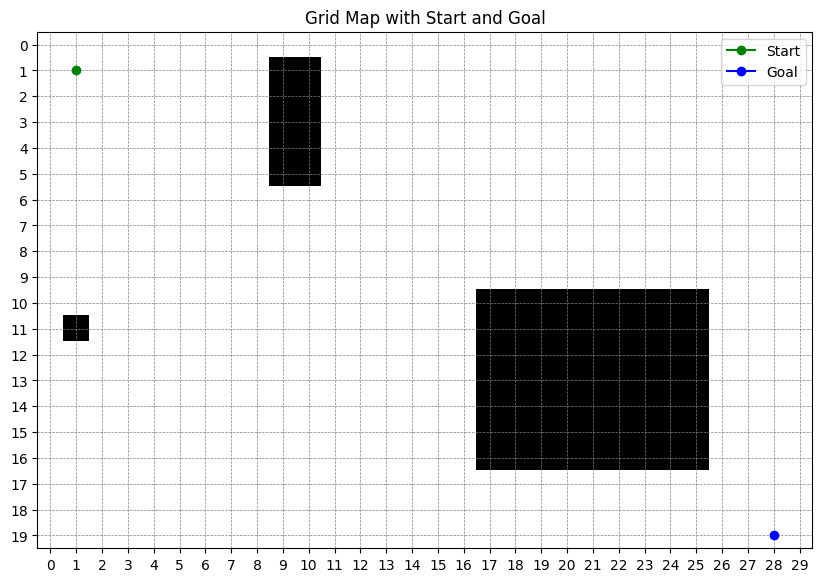

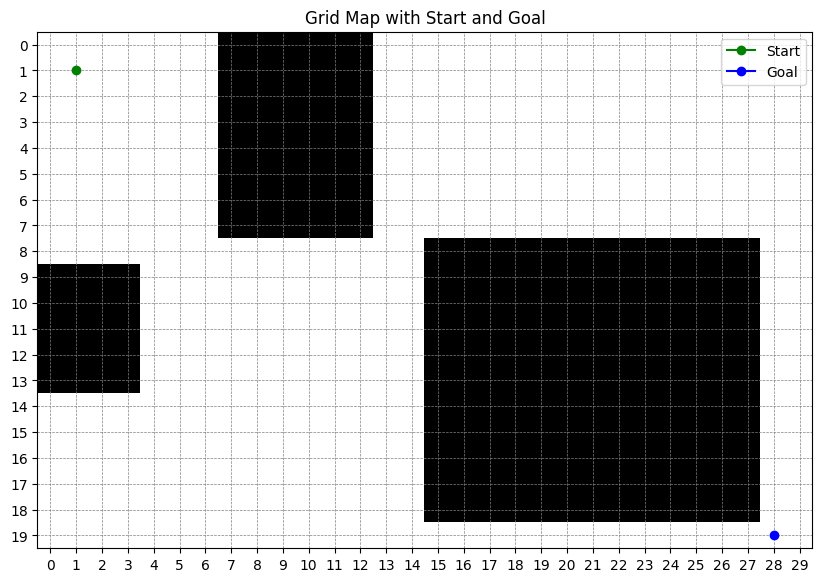

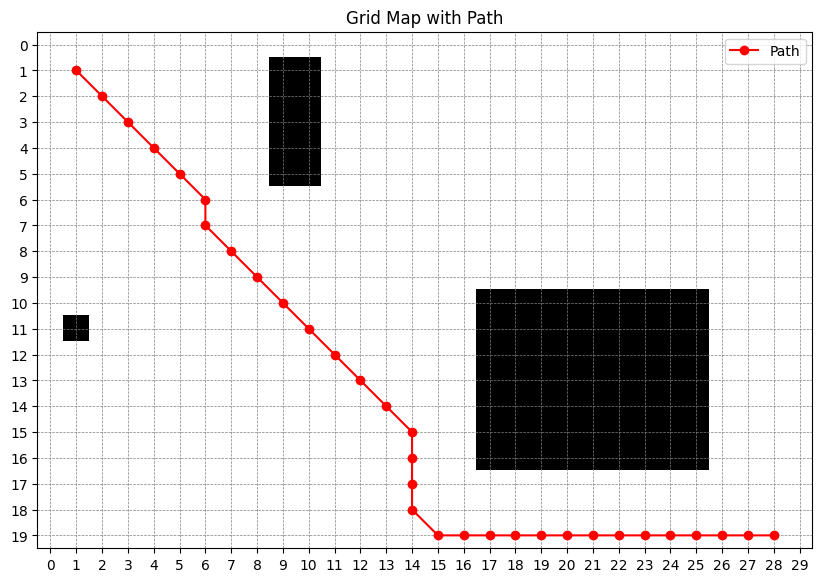

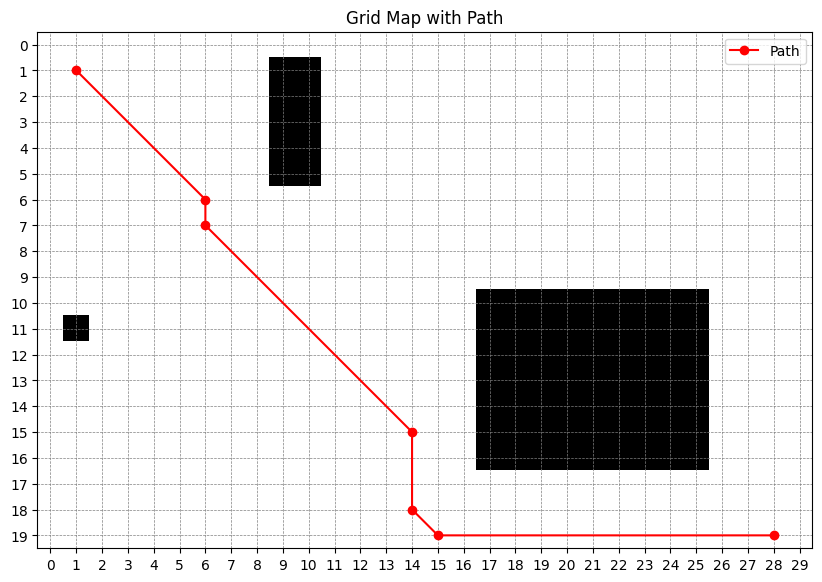

In [7]:
plotter.plot_map()
plotter.plot_map_given(matrix2, start, goal)
plotter.plot_path(path)
thymio.set_path(path.copy())
path2 = thymio.get_path_cells()
plotter.plot_path(path2)

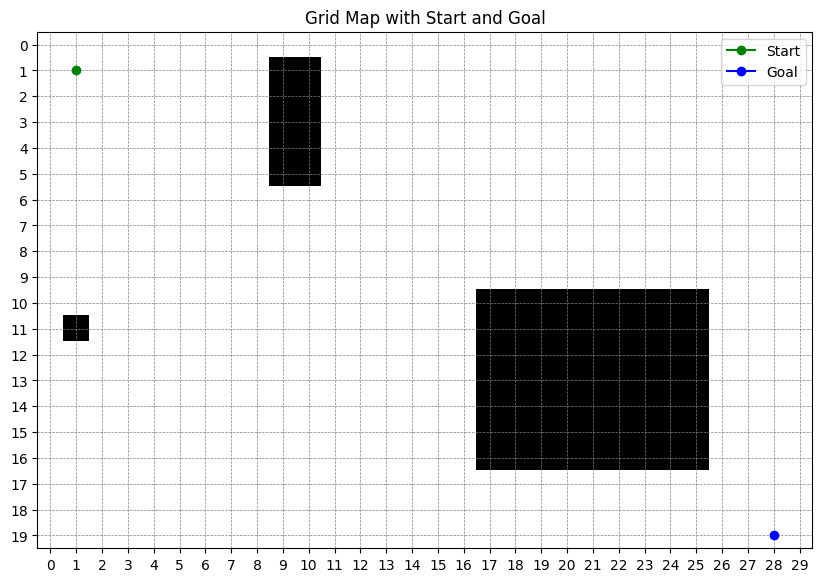

In [8]:
matrix = np.zeros((20, 30))
matrix[1:6, 9:11] = -1; matrix[11, 1] = -1; matrix[10:17, 17:26] = -1
start = (1, 1)
goal = (19, 28)
plotter.set_map(matrix, start, goal)

plotter.plot_map()

In [9]:
motor_go(100, 100)

In [12]:
motor_stop()

Position:  [1, 1]
position 0:  1
position 1:  1
Angle:  0.0
First iteration
Setting pose, position:  [1, 1]  angle:  0.0
Computing path
Map shape:  (20, 30)


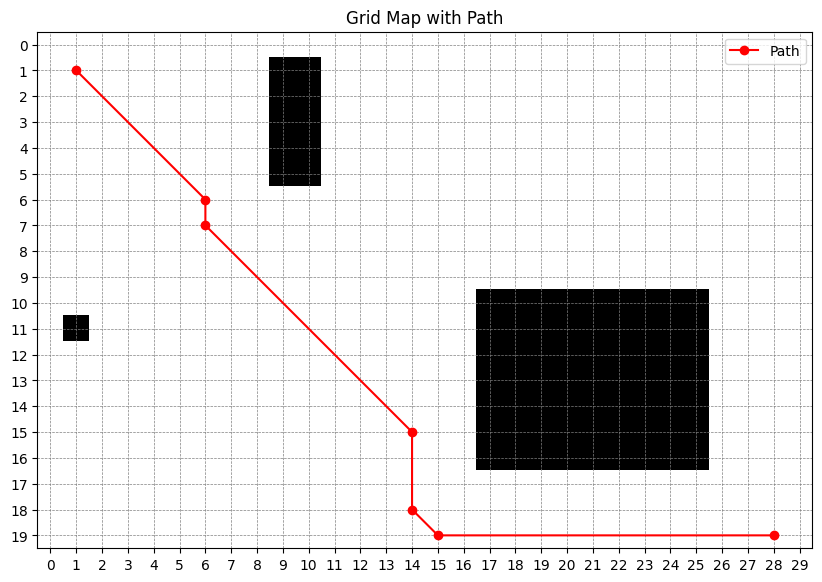

Path:  [[1.0, 1.0], [6.0, 6.0], [7.0, 6.0], [15.0, 14.0], [18.0, 14.0], [19.0, 15.0], [19.0, 28.0]]
Kalman update:  (100.0, 100.0, 0.0)
Kalman position used:  [100.0, 100.0]
current objective:  1
objective:  [600, 600]  position:  [100.0, 100.0]
x_diff:  500.0  y_diff:  500.0  distance:  707.1067811865476
my angle:  0.0
waypoint angle:  0.7853981633974483
diff angle:  0.7853981633974483
angleDistance:  0.7853981633974483
Speed:  0.0 3.14
Kalman prediction:  (99.99670263920589, 100.0, -0.001731114416908135)
Kalman pos 0:  100.0
Kalman pos 1:  100.0
v, w  0 3.14
angle:  0.0
New angle:  0.471
Trajectory:  [1.0] [1.0]


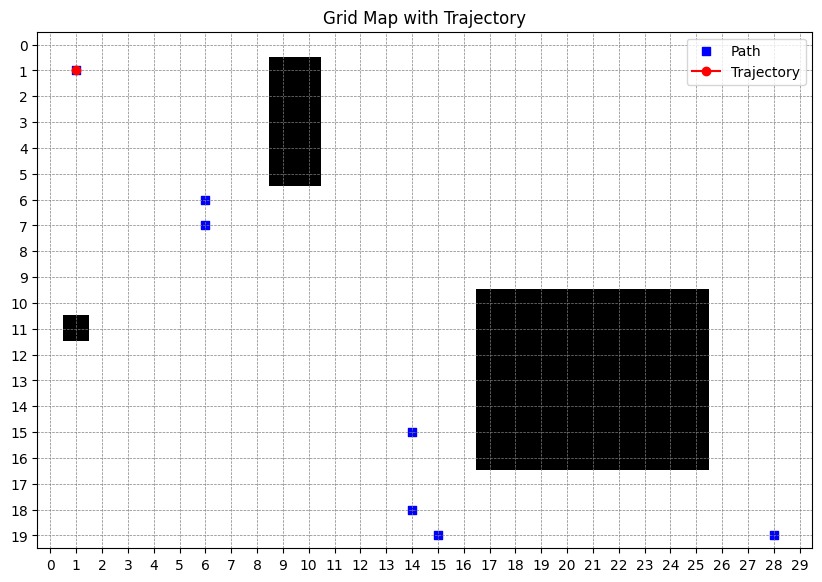

wl, wr:  -16 15
Position:  [1.0, 1.0]
position 0:  1.0
position 1:  1.0
Angle:  0.471
Kalman update:  (99.99929326734346, 100.0, 0.4630337218315444)
Kalman position used:  [99.99929326734346, 100.0]
current objective:  1
objective:  [600, 600]  position:  [99.99929326734346, 100.0]
x_diff:  500.00070673265657  y_diff:  500.0  distance:  707.107280922178
my angle:  0.4630337218315444
waypoint angle:  0.7853974566652913
diff angle:  0.32236373483374686
angleDistance:  0.3223637348337469
Speed:  0.0 1.3002003971627794
Kalman prediction:  (99.99929326734346, 100.0, 0.4630337218315444)
Kalman pos 0:  99.99929326734346
Kalman pos 1:  100.0
v, w  0 1.3002003971627794
angle:  0.4630337218315444
New angle:  0.6580637814059613
Trajectory:  [1.0, 1.0] [1.0, 1.0]


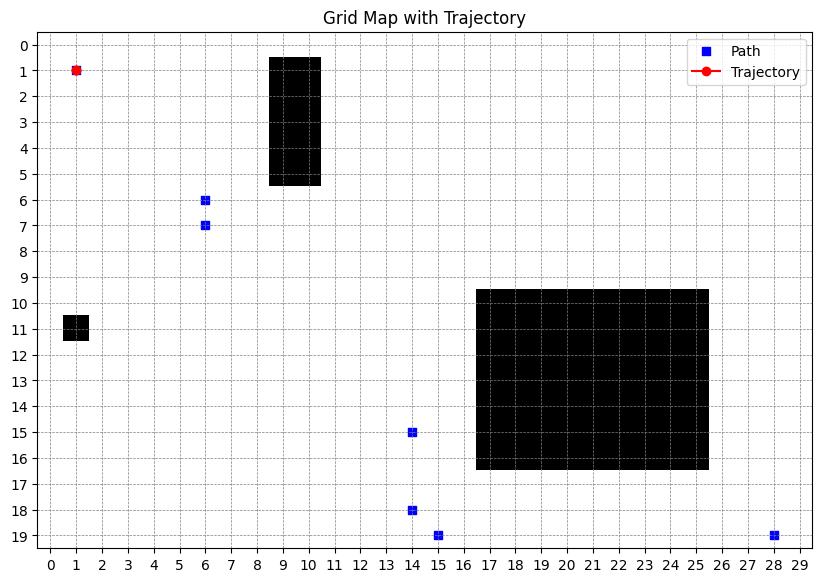

wl, wr:  -7 6
Position:  [0.9999929326734346, 1.0]
position 0:  0.9999929326734346
position 1:  1.0
Angle:  0.6580637814059613
Kalman update:  (99.99929326734346, 100.0, 0.6547772285562979)
Kalman position used:  [99.99929326734346, 100.0]
current objective:  1
objective:  [600, 600]  position:  [99.99929326734346, 100.0]
x_diff:  500.00070673265657  y_diff:  500.0  distance:  707.107280922178
my angle:  0.6547772285562979
waypoint angle:  0.7853974566652913
diff angle:  0.13062022810899332
angleDistance:  0.13062022810899343
Speed:  0.0 0.5268349200396069
Kalman prediction:  (99.99906985170432, 99.99982846818088, 0.654629352063622)
Kalman pos 0:  99.99929326734346
Kalman pos 1:  100.0
v, w  0 0.5268349200396069
angle:  0.6547772285562979
New angle:  0.7338024665622389
Trajectory:  [1.0, 1.0, 0.9999929326734346] [1.0, 1.0, 1.0]


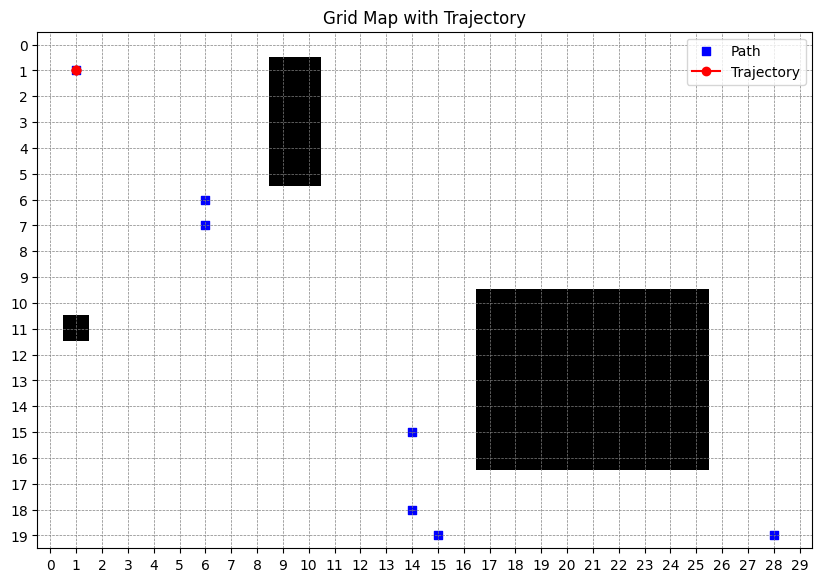

wl, wr:  -2 2
Position:  [0.9999929326734346, 1.0]
position 0:  0.9999929326734346
position 1:  1.0
Angle:  0.7338024665622389
Kalman update:  (99.99924438647494, 99.9999615091142, 0.7324682792822701)
Kalman position used:  [99.99924438647494, 99.9999615091142]
current objective:  1
objective:  [600, 600]  position:  [99.99924438647494, 99.9999615091142]
x_diff:  500.00075561352503  y_diff:  500.0000384908858  distance:  707.1073427033432
my angle:  0.7324682792822701
waypoint angle:  0.7853974462753786
diff angle:  0.052929166993108456
angleDistance:  0.052929166993108456
Speed:  5.0 0
Kalman prediction:  (100.03214779448673, 100.02955392769658, 0.7325209616603454)
Kalman pos 0:  99.99924438647494
Kalman pos 1:  99.9999615091142
v, w  500 0
angle:  0.7324682792822701
New angle:  0.7324682792822701
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346] [1.0, 1.0, 1.0, 1.0]


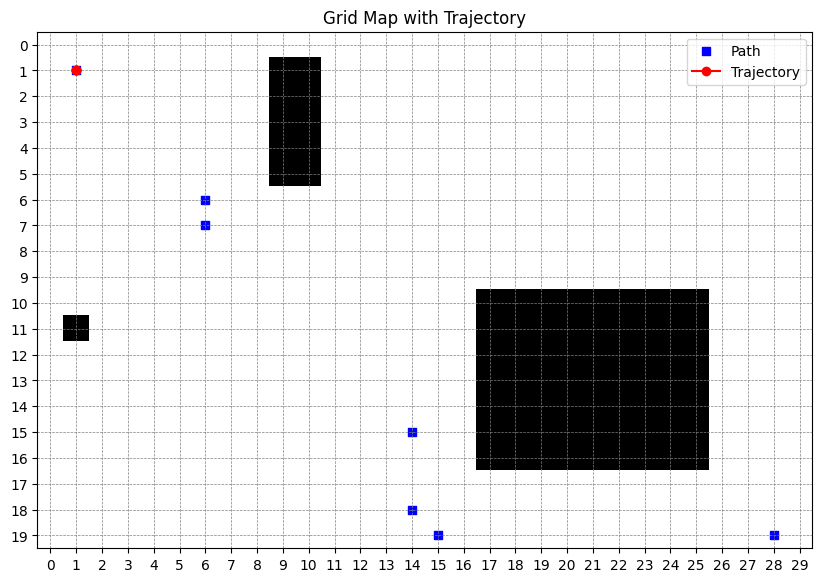

wl, wr:  58 52
Position:  [1.5576370290363235, 1.5015297902838447]
position 0:  1.5576370290363235
position 1:  1.5015297902838447
Angle:  0.7324682792822701
Kalman update:  (143.53547330468746, 139.0283579022354, 0.7324691670603897)
Kalman position used:  [143.53547330468746, 139.0283579022354]
current objective:  1
objective:  [600, 600]  position:  [143.53547330468746, 139.0283579022354]
x_diff:  456.46452669531254  y_diff:  460.97164209776463  distance:  648.7331646751886
my angle:  0.7324691670603897
waypoint angle:  0.7903108530173723
diff angle:  0.05784168595698258
angleDistance:  0.05784168595698258
Speed:  5.0 0
Kalman prediction:  (143.53547330468746, 139.0283579022354, 0.7324691670603897)
Kalman pos 0:  143.53547330468746
Kalman pos 1:  139.0283579022354
v, w  500 0
angle:  0.7324691670603897
New angle:  0.7324691670603897
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235] [1.0, 1.0, 1.0, 1.0, 1.5015297902838447]


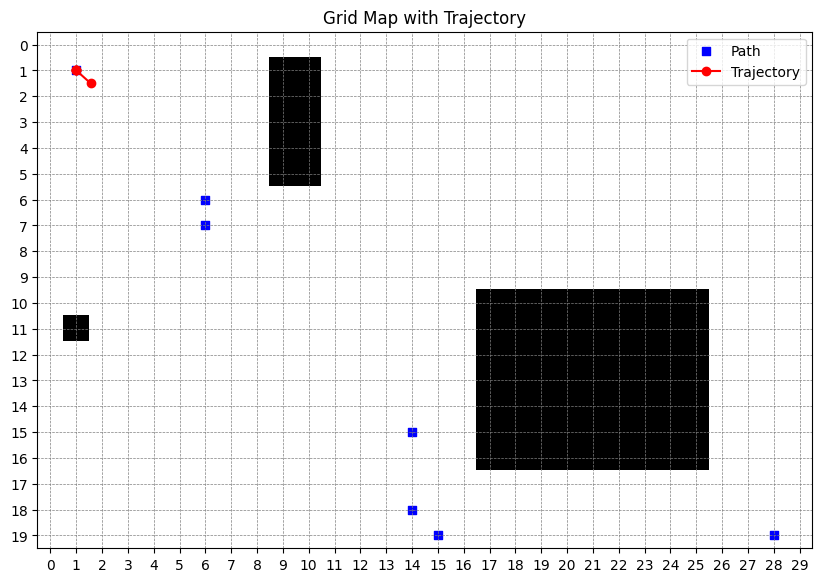

wl, wr:  58 52
Position:  [1.992998872970713, 1.8918142492795205]
position 0:  1.992998872970713
position 1:  1.8918142492795205
Angle:  0.7324691670603897
Kalman update:  (187.01147224927138, 178.11885295012627, 0.7324691670603897)
Kalman position used:  [187.01147224927138, 178.11885295012627]
current objective:  1
objective:  [600, 600]  position:  [187.01147224927138, 178.11885295012627]
x_diff:  412.9885277507286  y_diff:  421.88114704987373  distance:  590.3754960106589
my angle:  0.7324691670603897
waypoint angle:  0.7960492665428199
diff angle:  0.06358009948243026
angleDistance:  0.06358009948243026
Speed:  5.0 0
Kalman prediction:  (187.10667546424503, 178.20447625143612, 0.7326215991661477)
Kalman pos 0:  187.01147224927138
Kalman pos 1:  178.11885295012627
v, w  500 0
angle:  0.7324691670603897
New angle:  0.7324691670603897
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713] [1.0, 1.0, 1.0, 1.0, 1.5015297902838447, 1.89181

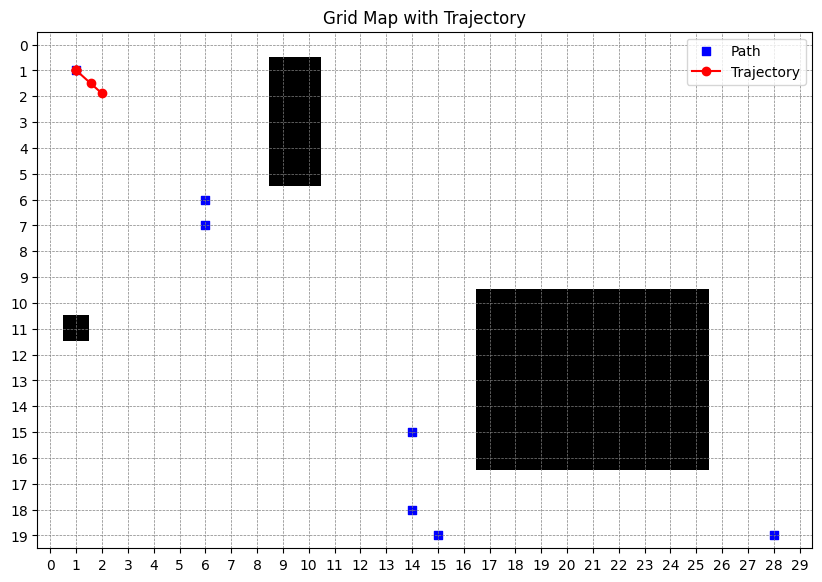

wl, wr:  58 52
Position:  [2.4277588624165523, 2.282719199758429]
position 0:  2.4277588624165523
position 1:  2.282719199758429
Angle:  0.7324691670603897
Kalman update:  (230.50382731534793, 217.23384997416204, 0.7324717357729867)
Kalman position used:  [230.50382731534793, 217.23384997416204]
current objective:  1
objective:  [600, 600]  position:  [230.50382731534793, 217.23384997416204]
x_diff:  369.49617268465204  y_diff:  382.766150025838  distance:  532.0125442451601
my angle:  0.7324717357729867
waypoint angle:  0.8030364270436648
diff angle:  0.0705646912706781
angleDistance:  0.0705646912706781
Speed:  5.0 0
Kalman prediction:  (230.58786653771182, 217.30943306067792, 0.7326062932585672)
Kalman pos 0:  230.50382731534793
Kalman pos 1:  217.23384997416204
v, w  500 0
angle:  0.7324717357729867
New angle:  0.7324717357729867
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523] [1.0, 1.0, 1.0, 1.0, 1.50152979

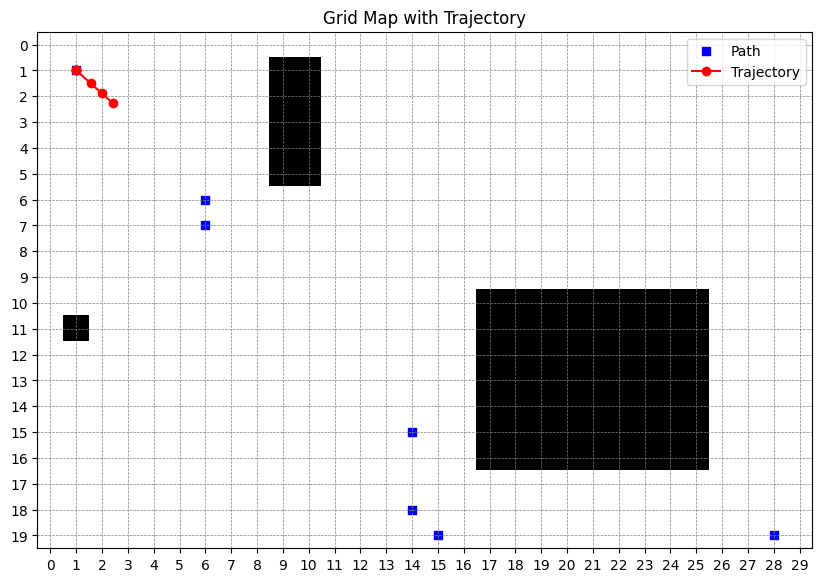

wl, wr:  58 52
Position:  [2.8626811247873274, 2.673870602424659]
position 0:  2.8626811247873274
position 1:  2.673870602424659
Angle:  0.7324717357729867
Kalman update:  (273.9932248813607, 256.34720859570194, 0.7324740032710739)
Kalman position used:  [273.9932248813607, 256.34720859570194]
current objective:  1
objective:  [600, 600]  position:  [273.9932248813607, 256.34720859570194]
x_diff:  326.0067751186393  y_diff:  343.65279140429806  distance:  473.68518919554685
my angle:  0.7324740032710739
waypoint angle:  0.8117427937653303
diff angle:  0.07926879049425639
angleDistance:  0.07926879049425661
Speed:  5.0 0
Kalman prediction:  (273.9932248813607, 256.34720859570194, 0.7324740032710739)
Kalman pos 0:  273.9932248813607
Kalman pos 1:  256.34720859570194
v, w  500 0
angle:  0.7324740032710739
New angle:  0.7324740032710739
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274] [1.0, 1.0, 1

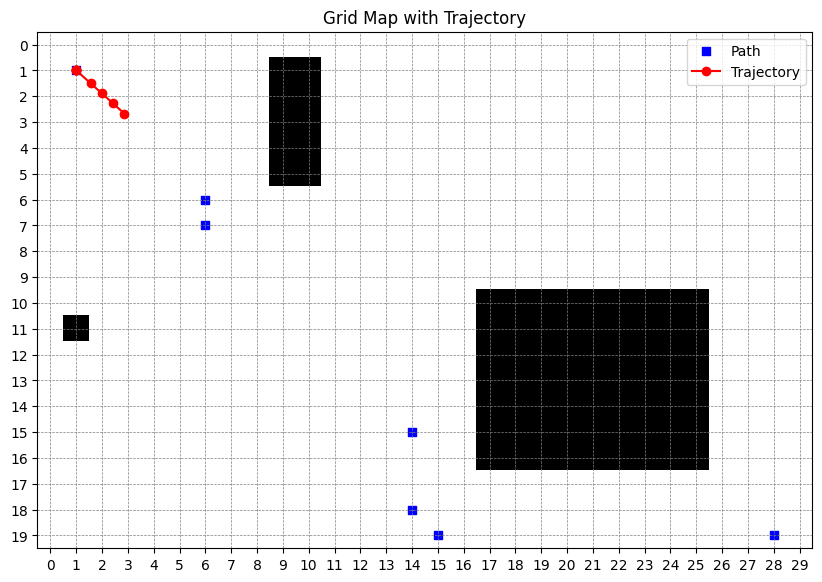

wl, wr:  58 52
Position:  [3.297573963222938, 3.065005453092868]
position 0:  3.297573963222938
position 1:  3.065005453092868
Angle:  0.7324740032710739
Kalman update:  (317.46397306922023, 295.44404207825414, 0.7324740032710739)
Kalman position used:  [317.46397306922023, 295.44404207825414]
current objective:  1
objective:  [600, 600]  position:  [317.46397306922023, 295.44404207825414]
x_diff:  282.53602693077977  y_diff:  304.55595792174586  distance:  415.4286196441725
my angle:  0.7324740032710739
waypoint angle:  0.822887372395468
diff angle:  0.09041336912439413
angleDistance:  0.09041336912439402
Speed:  5.0 0
Kalman prediction:  (317.53960229268773, 295.51206170110413, 0.7325950955255393)
Kalman pos 0:  317.46397306922023
Kalman pos 1:  295.44404207825414
v, w  500 0
angle:  0.7324740032710739
New angle:  0.7324740032710739
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.29757396

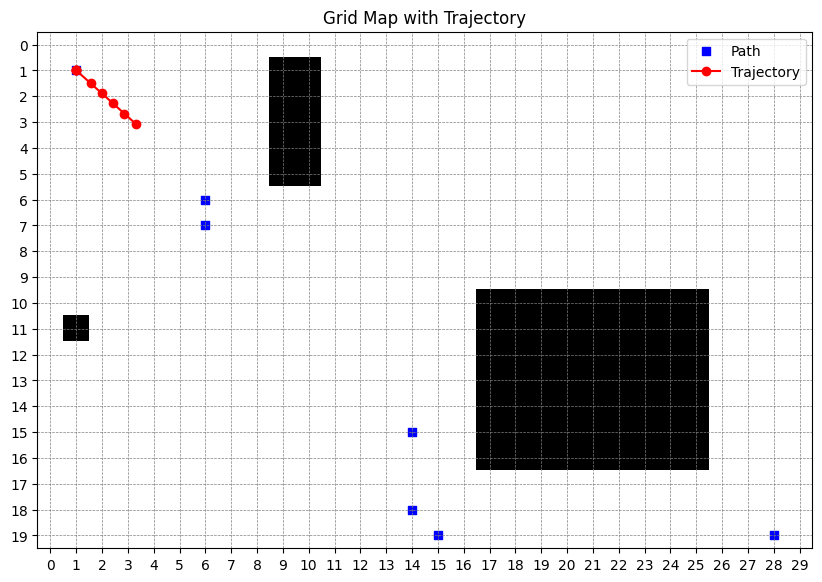

wl, wr:  58 52
Position:  [3.7322814451015334, 3.45597378791839]
position 0:  3.7322814451015334
position 1:  3.45597378791839
Angle:  0.7324740032710739
Kalman update:  (360.95138958189114, 334.55587573232754, 0.7324760438595569)
Kalman position used:  [360.95138958189114, 334.55587573232754]
current objective:  1
objective:  [600, 600]  position:  [360.95138958189114, 334.55587573232754]
x_diff:  239.04861041810886  y_diff:  265.44412426767246  distance:  357.21817038199544
my angle:  0.7324760438595569
waypoint angle:  0.8376713991043149
diff angle:  0.10519535524475798
angleDistance:  0.1051953552447582
Speed:  0.0 0.4242879328205248
Kalman prediction:  (360.95122880422514, 334.55573113106647, 0.7323625187761023)
Kalman pos 0:  360.95138958189114
Kalman pos 1:  334.55587573232754
v, w  0 0.4242879328205248
angle:  0.7324760438595569
New angle:  0.7961192337826356
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.427758862416552

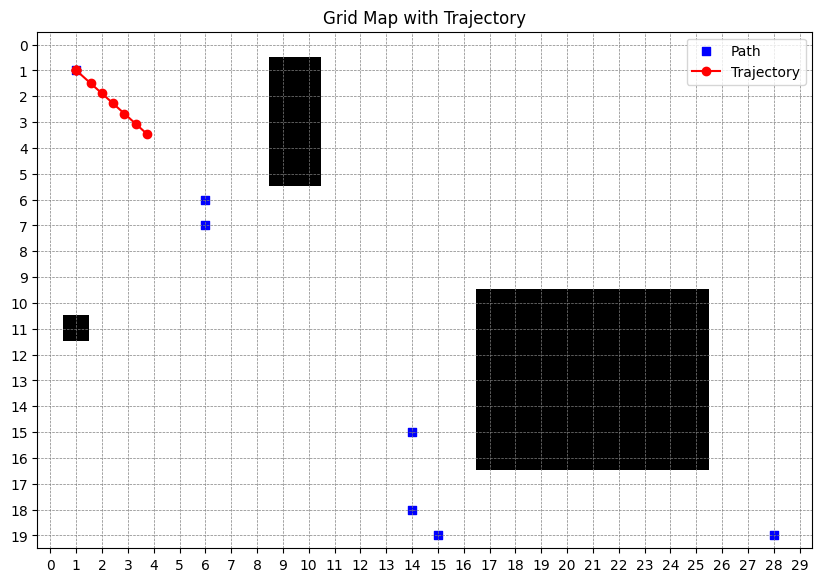

wl, wr:  -2 2
Position:  [3.6095138958189112, 3.3455587573232752]
position 0:  3.6095138958189112
position 1:  3.3455587573232752
Angle:  0.7961192337826356
Kalman update:  (360.9513541378346, 334.5558438544136, 0.795044836258767)
Kalman position used:  [360.9513541378346, 334.5558438544136]
current objective:  1
objective:  [600, 600]  position:  [360.9513541378346, 334.5558438544136]
x_diff:  239.04864586216542  y_diff:  265.4441561455864  distance:  357.2182177890392
my angle:  0.795044836258767
waypoint angle:  0.8376713850919503
diff angle:  0.042626548833183286
angleDistance:  0.042626548833183175
Speed:  5.0 0
Kalman prediction:  (361.0131636524759, 334.6188575349369, 0.795149916538204)
Kalman pos 0:  360.9513541378346
Kalman pos 1:  334.5558438544136
v, w  500 0
angle:  0.795044836258767
New angle:  0.795044836258767
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573963222938, 3

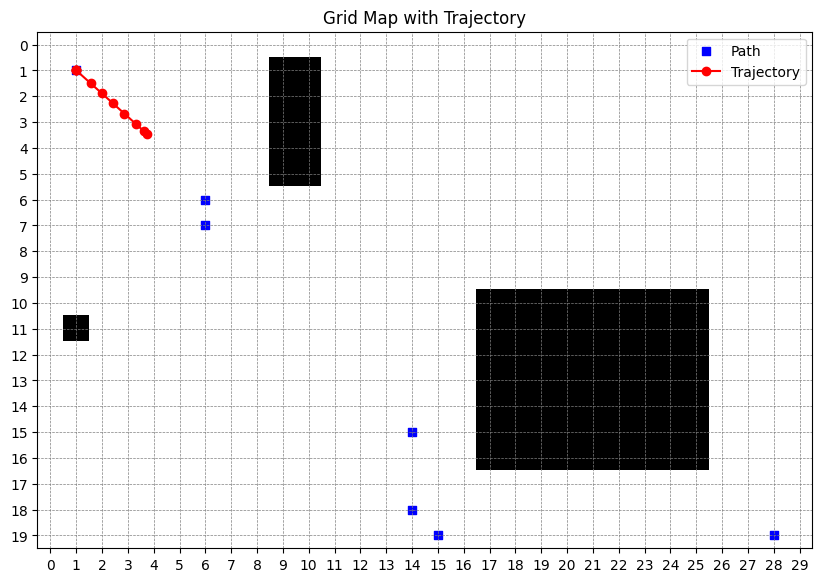

wl, wr:  58 52
Position:  [4.134703110151231, 3.8809796903189886]
position 0:  4.134703110151231
position 1:  3.8809796903189886
Angle:  0.795044836258767
Kalman update:  (401.94960556925867, 376.2620308298098, 0.7950466070211412)
Kalman position used:  [401.94960556925867, 376.2620308298098]
current objective:  1
objective:  [600, 600]  position:  [401.94960556925867, 376.2620308298098]
x_diff:  198.05039443074133  y_diff:  223.73796917019018  distance:  298.8020039801828
my angle:  0.7950466070211412
waypoint angle:  0.8462246086567972
diff angle:  0.051178001635656
angleDistance:  0.05117800163565622
Speed:  5.0 0
Kalman prediction:  (401.94960556925867, 376.2620308298098, 0.7950466070211412)
Kalman pos 0:  401.94960556925867
Kalman pos 1:  376.2620308298098
v, w  500 0
angle:  0.7950466070211412
New angle:  0.7950466070211412
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.2975739632229

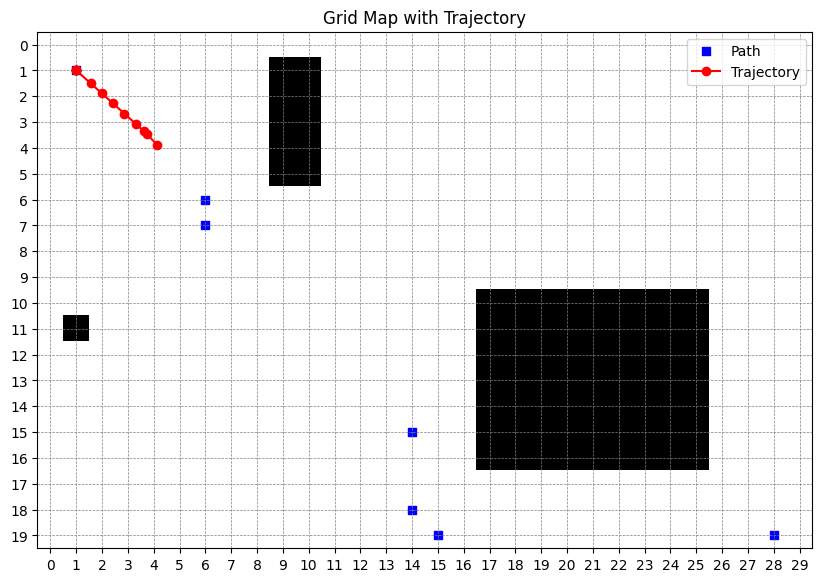

wl, wr:  58 52
Position:  [4.544684676360842, 4.298042490058039]
position 0:  4.544684676360842
position 1:  4.298042490058039
Angle:  0.7950466070211412
Kalman update:  (442.8942241406438, 417.9968193746747, 0.7950466070211412)
Kalman position used:  [442.8942241406438, 417.9968193746747]
current objective:  1
objective:  [600, 600]  position:  [442.8942241406438, 417.9968193746747]
x_diff:  157.10577585935619  y_diff:  182.00318062532529  distance:  240.4316588265885
my angle:  0.7950466070211412
waypoint angle:  0.8586867388836629
diff angle:  0.06364013186252171
angleDistance:  0.06364013186252171
Speed:  5.0 0
Kalman prediction:  (442.8942241406438, 417.9968193746747, 0.7950466070211412)
Kalman pos 0:  442.8942241406438
Kalman pos 1:  417.9968193746747
v, w  500 0
angle:  0.7950466070211412
New angle:  0.7950466070211412
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573963222938, 

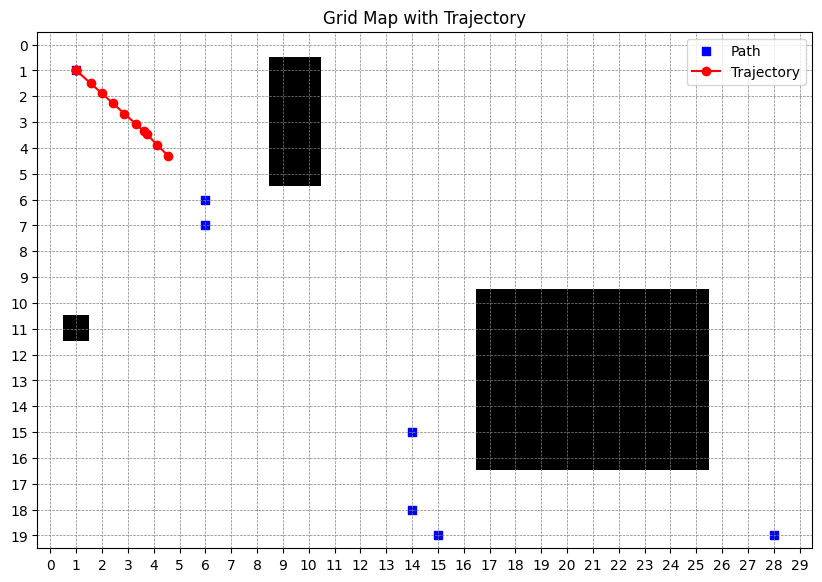

wl, wr:  58 52
Position:  [4.9541308620746936, 4.715390375506688]
position 0:  4.9541308620746936
position 1:  4.715390375506688
Angle:  0.7950466070211412
Kalman update:  (483.8354173747332, 459.73512739239436, 0.7950466070211412)
Kalman position used:  [483.8354173747332, 459.73512739239436]
current objective:  1
objective:  [600, 600]  position:  [483.8354173747332, 459.73512739239436]
x_diff:  116.1645826252668  y_diff:  140.26487260760564  distance:  182.1220600150632
my angle:  0.7950466070211412
waypoint angle:  0.8791069937976579
diff angle:  0.08406038677651673
angleDistance:  0.08406038677651662
Speed:  5.0 0
Kalman prediction:  (483.85270838989857, 459.7527553315773, 0.7950760029482236)
Kalman pos 0:  483.8354173747332
Kalman pos 1:  459.73512739239436
v, w  500 0
angle:  0.7950466070211412
New angle:  0.7950466070211412
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.29757396322

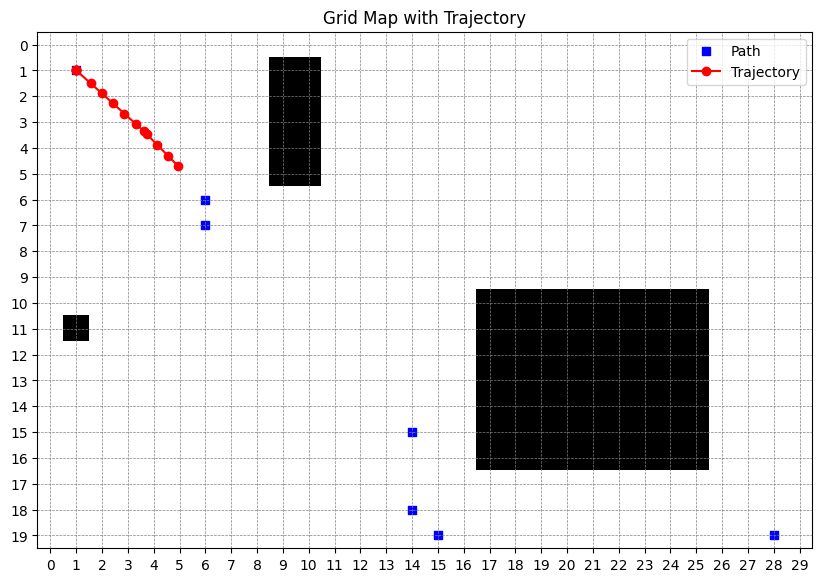

wl, wr:  58 52
Position:  [5.3635427944155865, 5.132773455683885]
position 0:  5.3635427944155865
position 1:  5.132773455683885
Angle:  0.7950466070211412
Kalman update:  (524.7801312033048, 501.4776150342725, 0.7950471023871786)
Kalman position used:  [524.7801312033048, 501.4776150342725]
current objective:  1
objective:  [600, 600]  position:  [524.7801312033048, 501.4776150342725]
x_diff:  75.21986879669521  y_diff:  98.5223849657275  distance:  123.95438274271325
my angle:  0.7950471023871786
waypoint angle:  0.9187237012504201
diff angle:  0.12367659886324156
angleDistance:  0.12367659886324134
Speed:  0.0 0.4988289487484067
Kalman prediction:  (524.7801312033048, 501.4776150342725, 0.7950471023871786)
Kalman pos 0:  524.7801312033048
Kalman pos 1:  501.4776150342725
v, w  0 0.4988289487484067
angle:  0.7950471023871786
New angle:  0.8698714446994396
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.86268

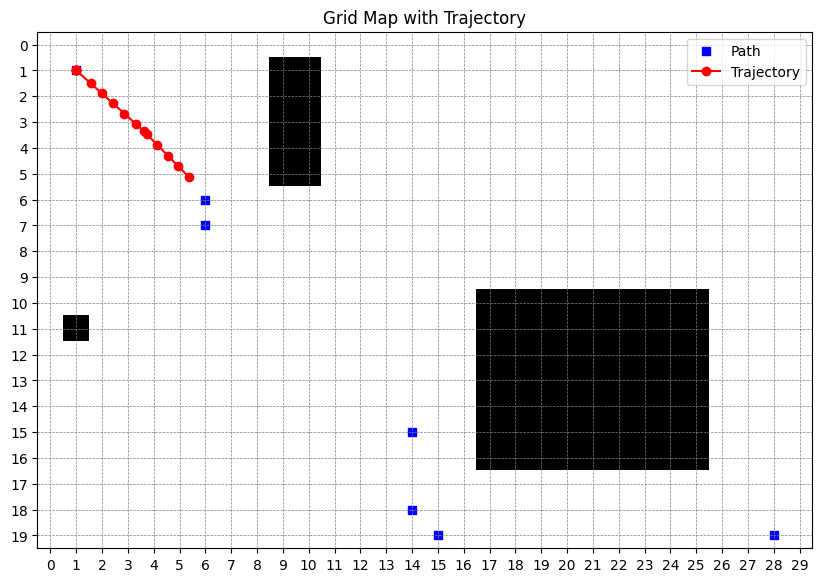

wl, wr:  -2 2
Position:  [5.247801312033048, 5.014776150342725]
position 0:  5.247801312033048
position 1:  5.014776150342725
Angle:  0.8698714446994396
Kalman update:  (524.7801312033048, 501.4776150342725, 0.8686105408386126)
Kalman position used:  [524.7801312033048, 501.4776150342725]
current objective:  1
objective:  [600, 600]  position:  [524.7801312033048, 501.4776150342725]
x_diff:  75.21986879669521  y_diff:  98.5223849657275  distance:  123.95438274271325
my angle:  0.8686105408386126
waypoint angle:  0.9187237012504201
diff angle:  0.05011316041180758
angleDistance:  0.05011316041180747
Speed:  5.0 0
Kalman prediction:  (524.8572064900746, 501.56871715307693, 0.8687526030908306)
Kalman pos 0:  524.7801312033048
Kalman pos 1:  501.4776150342725
v, w  500 0
angle:  0.8686105408386126
New angle:  0.8686105408386126
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573963222938, 3.

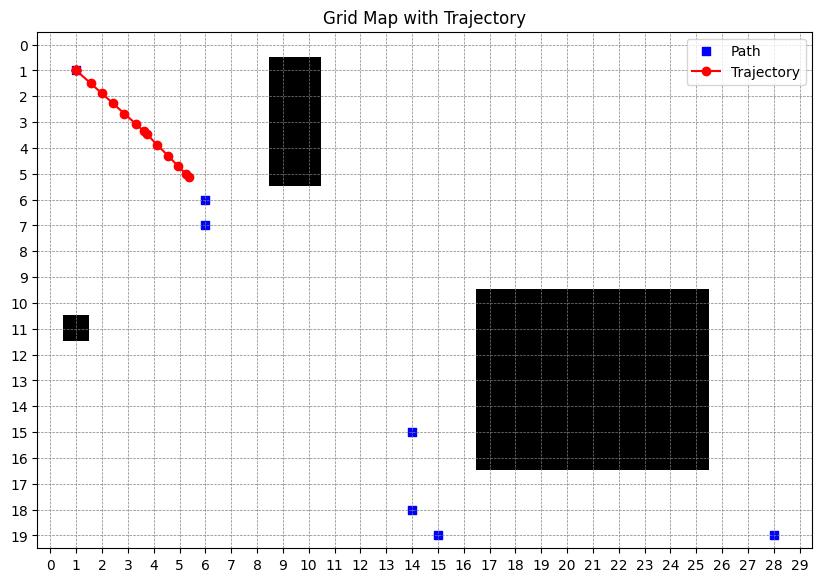

wl, wr:  58 52
Position:  [5.732217258252217, 5.58735032985887]
position 0:  5.732217258252217
position 1:  5.58735032985887
Angle:  0.8686105408386126
Kalman update:  (562.6143834566373, 546.0817161001934, 0.8686129348034208)
Kalman position used:  [562.6143834566373, 546.0817161001934]
current objective:  1
objective:  [600, 600]  position:  [562.6143834566373, 546.0817161001934]
x_diff:  37.385616543362744  y_diff:  53.918283899806625  distance:  65.61147508650834
my angle:  0.8686129348034208
waypoint angle:  0.9645301923098701
diff angle:  0.0959172575064493
angleDistance:  0.09591725750644908
Speed:  5.0 0
Kalman prediction:  (562.6269255186849, 546.096540747911, 0.8686360519230366)
Kalman pos 0:  562.6143834566373
Kalman pos 1:  546.0817161001934
v, w  500 0
angle:  0.8686129348034208
New angle:  0.8686129348034208
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573963222938, 3.73

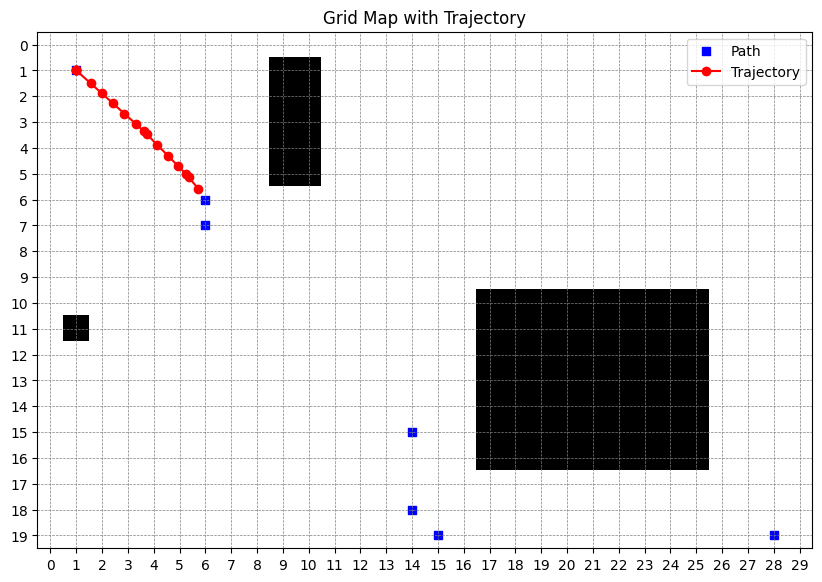

wl, wr:  58 52
Position:  [6.110558410061718, 6.033392500191166]
position 0:  6.110558410061718
position 1:  6.033392500191166
Angle:  0.8686129348034208
Kalman update:  (600.3841979235135, 590.7156800465909, 0.868613324362012)
Kalman position used:  [600.3841979235135, 590.7156800465909]
current objective:  1
objective:  [600, 600]  position:  [600.3841979235135, 590.7156800465909]
x_diff:  -0.38419792351351134  y_diff:  9.284319953409067  distance:  9.292265872310253
Next objective:  2
x_diff:  -0.38419792351351134  y_diff:  109.28431995340907  distance:  109.28499529086102
my angle:  0.868613324362012
waypoint angle:  1.5743118937205236
diff angle:  0.7056985693585116
angleDistance:  0.7056985693585114
Speed:  0.0 2.8463175630793294
Kalman prediction:  (600.3835097299816, 590.7148666050139, 0.8680539350668695)
Kalman pos 0:  600.3841979235135
Kalman pos 1:  590.7156800465909
v, w  0 2.8463175630793294
angle:  0.868613324362012
New angle:  1.2955609588239114
Trajectory:  [1.0, 1.0, 0

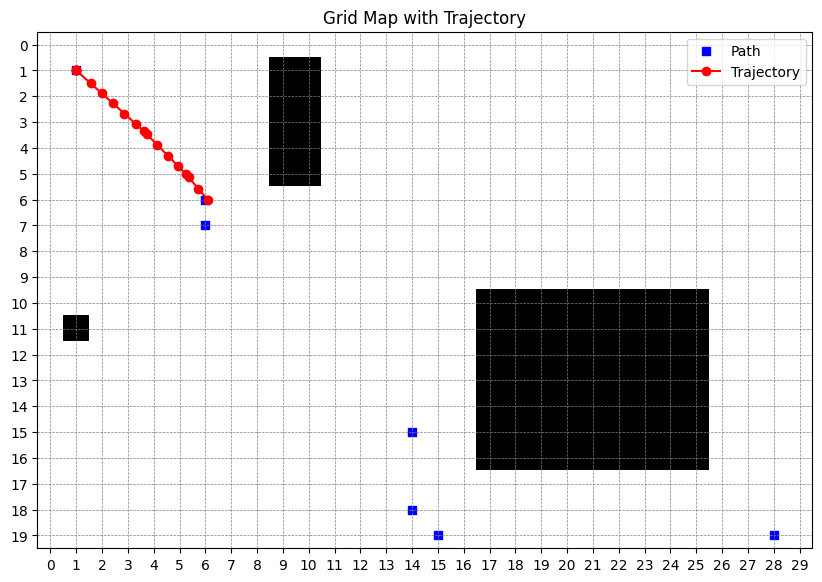

wl, wr:  -15 13
Position:  [6.003841979235135, 5.907156800465909]
position 0:  6.003841979235135
position 1:  5.907156800465909
Angle:  1.2955609588239114
Kalman update:  (600.384046214259, 590.7155007152807, 1.2883568158922387)
Kalman position used:  [600.384046214259, 590.7155007152807]
current objective:  2
objective:  [600, 700]  position:  [600.384046214259, 590.7155007152807]
x_diff:  -0.3840462142590013  y_diff:  109.28449928471935  distance:  109.28517408782633
my angle:  1.2883568158922387
waypoint angle:  1.574310499764132
diff angle:  0.28595368387189324
angleDistance:  0.28595368387189346
Speed:  0.0 1.1533465249499704
Kalman prediction:  (600.384046214259, 590.7155007152807, 1.2883568158922387)
Kalman pos 0:  600.384046214259
Kalman pos 1:  590.7155007152807
v, w  0 1.1533465249499704
angle:  1.2883568158922387
New angle:  1.4613587946347342
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.86268112

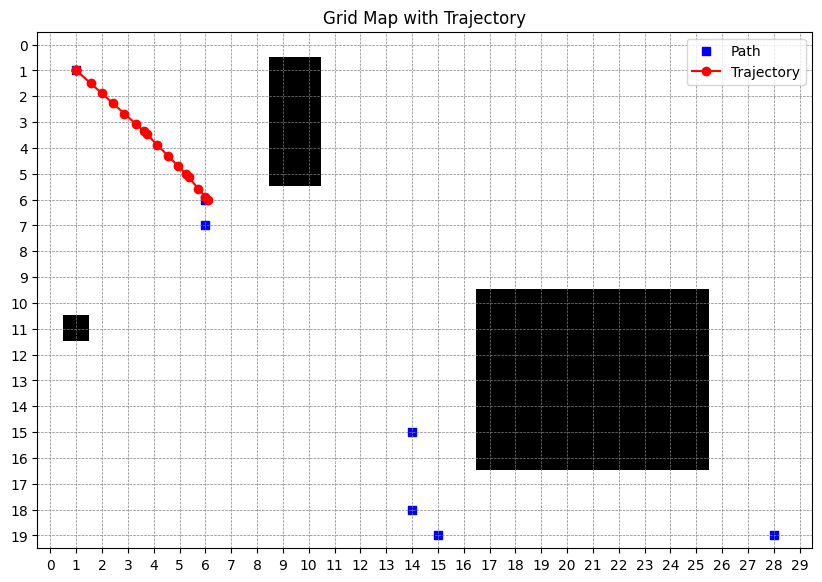

wl, wr:  -6 5
Position:  [6.00384046214259, 5.907155007152807]
position 0:  6.00384046214259
position 1:  5.907155007152807
Angle:  1.4613587946347342
Kalman update:  (600.384046214259, 590.7155007152807, 1.4584434484227116)
Kalman position used:  [600.384046214259, 590.7155007152807]
current objective:  2
objective:  [600, 700]  position:  [600.384046214259, 590.7155007152807]
x_diff:  -0.3840462142590013  y_diff:  109.28449928471935  distance:  109.28517408782633
my angle:  1.4584434484227116
waypoint angle:  1.574310499764132
diff angle:  0.11586705134142039
angleDistance:  0.11586705134142061
Speed:  0.0 0.4673304404103965
Kalman prediction:  (600.3840305185878, 590.7153616038245, 1.45836995151404)
Kalman pos 0:  600.384046214259
Kalman pos 1:  590.7155007152807
v, w  0 0.4673304404103965
angle:  1.4584434484227116
New angle:  1.528543014484271
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.86268112478732

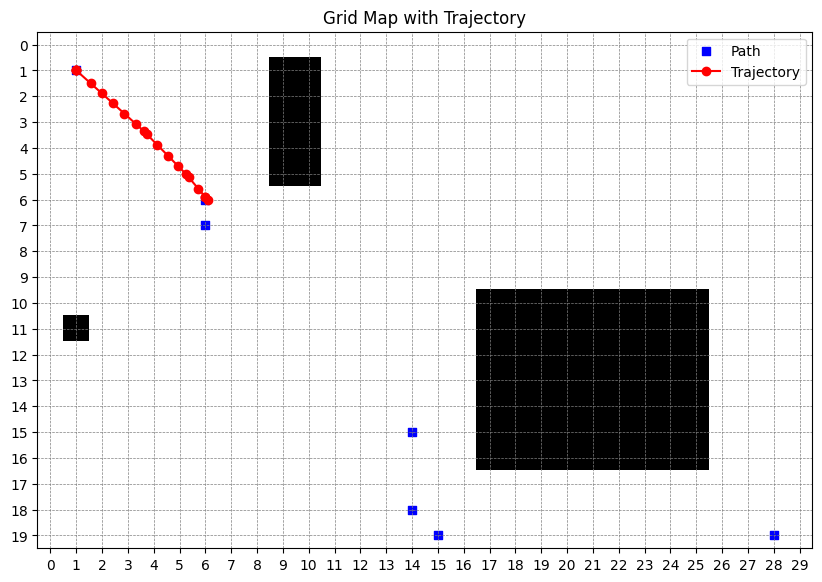

wl, wr:  -2 2
Position:  [6.00384046214259, 5.907155007152807]
position 0:  6.00384046214259
position 1:  5.907155007152807
Angle:  1.528543014484271
Kalman update:  (600.3840431085687, 590.7154699534178, 1.527360491747807)
Kalman position used:  [600.3840431085687, 590.7154699534178]
current objective:  2
objective:  [600, 700]  position:  [600.3840431085687, 590.7154699534178]
x_diff:  -0.38404310856867596  y_diff:  109.28453004658218  distance:  109.28520483858536
my angle:  1.527360491747807
waypoint angle:  1.5743104703569175
diff angle:  0.04694997860911054
angleDistance:  0.046949978609110765
Speed:  5.0 0
Kalman prediction:  (600.3889238673036, 590.8277663759509, 1.5274943041753277)
Kalman pos 0:  600.3840431085687
Kalman pos 1:  590.7154699534178
v, w  500 0
angle:  1.527360491747807
New angle:  1.527360491747807
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573963222938, 3.73

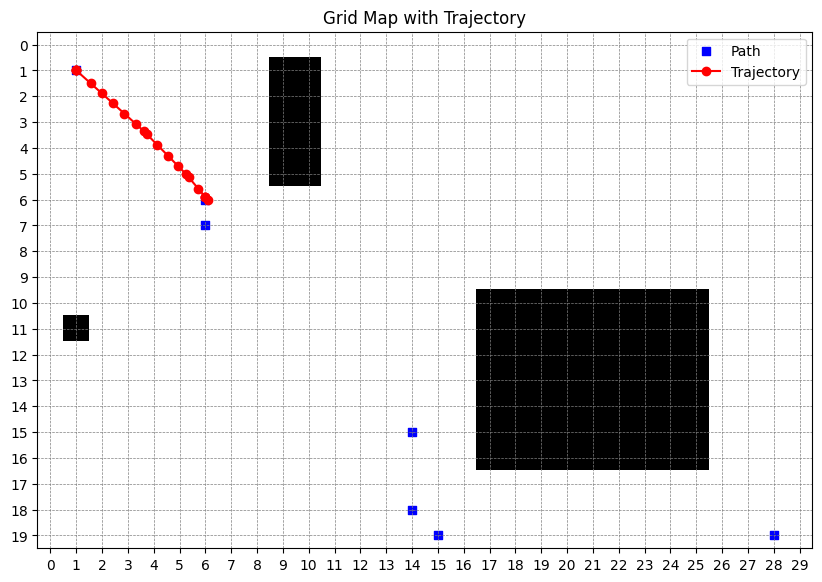

wl, wr:  58 52
Position:  [6.0364070646918275, 6.656447308850168]
position 0:  6.0364070646918275
position 1:  6.656447308850168
Angle:  1.527360491747807
Kalman update:  (603.0088358280823, 649.141631542162, 1.5273627466905337)
Kalman position used:  [603.0088358280823, 649.141631542162]
current objective:  2
objective:  [600, 700]  position:  [603.0088358280823, 649.141631542162]
x_diff:  -3.008835828082283  y_diff:  50.85836845783797  distance:  50.947293698817404
my angle:  1.5273627466905337
waypoint angle:  1.629888525995947
diff angle:  0.10252577930541329
angleDistance:  0.10252577930541307
Speed:  0.0 0.41352064319849935
Kalman prediction:  (603.0088297930101, 649.1414926800954, 1.5272897752870185)
Kalman pos 0:  603.0088358280823
Kalman pos 1:  649.141631542162
v, w  0 0.41352064319849935
angle:  1.5273627466905337
New angle:  1.5893908431703085
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811

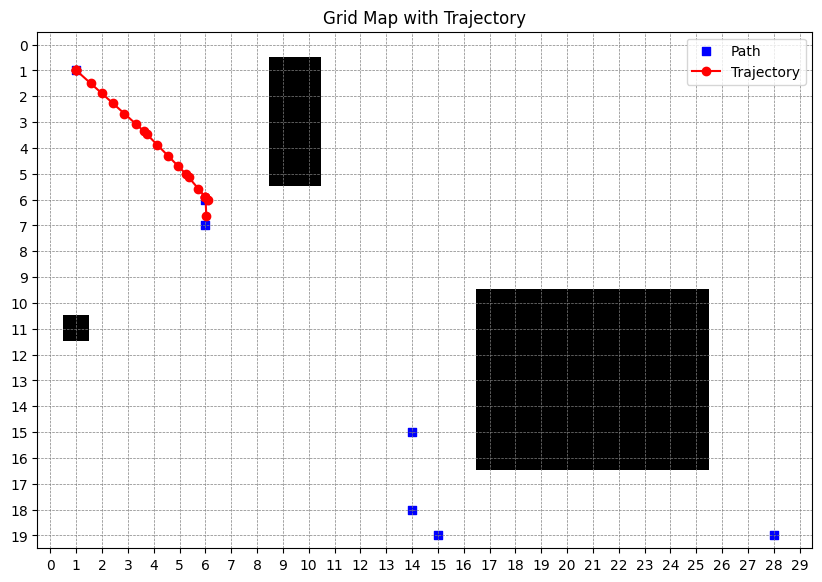

wl, wr:  -2 2
Position:  [6.030088358280823, 6.4914163154216205]
position 0:  6.030088358280823
position 1:  6.4914163154216205
Angle:  1.5893908431703085
Kalman update:  (603.0088345109301, 649.1416009283832, 1.5883443458161621)
Kalman position used:  [603.0088345109301, 649.1416009283832]
current objective:  2
objective:  [600, 700]  position:  [603.0088345109301, 649.1416009283832]
x_diff:  -3.0088345109301144  y_diff:  50.85839907161676  distance:  50.947324181373766
my angle:  1.5883443458161621
waypoint angle:  1.6298884647005583
diff angle:  0.04154411888439613
angleDistance:  0.04154411888439613
Speed:  5.0 0
Kalman prediction:  (603.0073720290152, 649.2249340838038, 1.588443567229948)
Kalman pos 0:  603.0088345109301
Kalman pos 1:  649.1416009283832
v, w  500 0
angle:  1.5883443458161621
New angle:  1.5883443458161621
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573963222938,

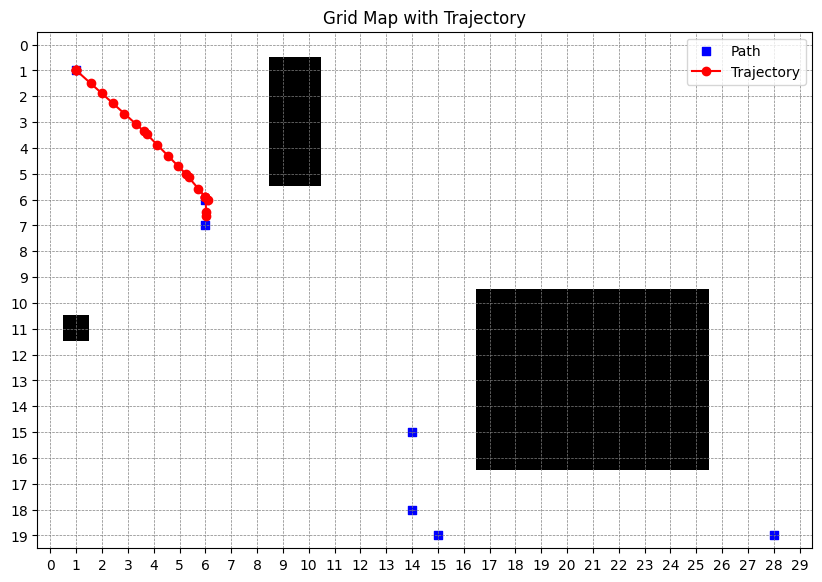

wl, wr:  58 52
Position:  [6.016928006284657, 7.241300537382673]
position 0:  6.016928006284657
position 1:  7.241300537382673
Angle:  1.5883443458161621
Kalman update:  (602.04518681097, 707.6156507464858, 1.5883460178477478)
Kalman position used:  [602.04518681097, 707.6156507464858]
current objective:  2
objective:  [600, 700]  position:  [602.04518681097, 707.6156507464858]
x_diff:  -2.0451868109699944  y_diff:  -7.615650746485812  distance:  7.885488278110337
Next objective:  3
x_diff:  797.95481318903  y_diff:  792.3843492535142  distance:  1124.5465045223584
my angle:  1.5883460178477478
waypoint angle:  0.7818954884421897
diff angle:  -0.8064505294055581
angleDistance:  -0.806450529405558
Speed:  0.0 -3.14
Kalman prediction:  (602.0451658418394, 707.6168454671056, 1.588973342776091)
Kalman pos 0:  602.04518681097
Kalman pos 1:  707.6156507464858
v, w  0 -3.14
angle:  1.5883460178477478
New angle:  1.1173460178477477
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346

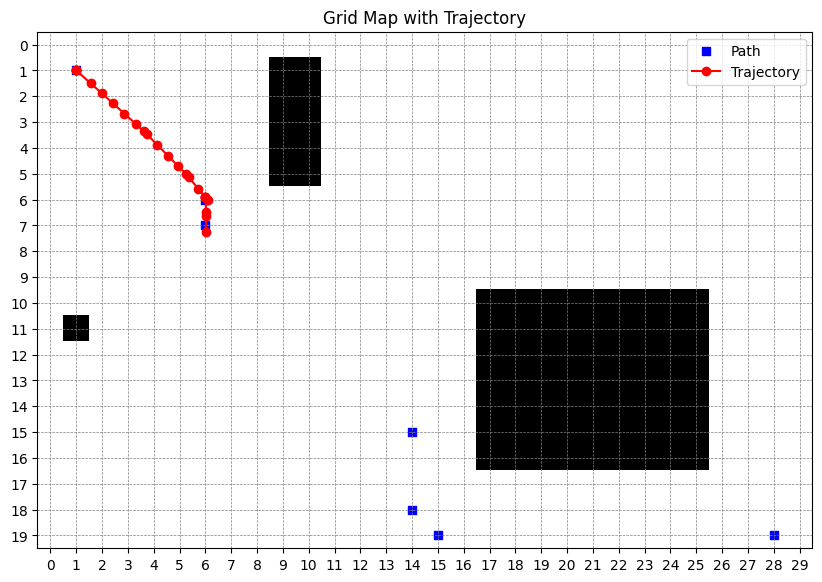

wl, wr:  16 -15
Position:  [6.0204518681097, 7.076156507464858]
position 0:  6.0204518681097
position 1:  7.076156507464858
Angle:  1.1173460178477477
Kalman update:  (602.0451821041883, 707.6159141276676, 1.125293654893349)
Kalman position used:  [602.0451821041883, 707.6159141276676]
current objective:  3
objective:  [1400, 1500]  position:  [602.0451821041883, 707.6159141276676]
x_diff:  797.9548178958117  y_diff:  792.3840858723324  distance:  1124.5463222770638
my angle:  1.125293654893349
waypoint angle:  0.7818953193016885
diff angle:  -0.34339833559166044
angleDistance:  -0.34339833559166033
Speed:  0.0 -1.38503995355303
Kalman prediction:  (602.0451821041883, 707.6159141276676, 1.125293654893349)
Kalman pos 0:  602.0451821041883
Kalman pos 1:  707.6159141276676
v, w  0 -1.38503995355303
angle:  1.125293654893349
New angle:  0.9175376618603945
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.86268112478

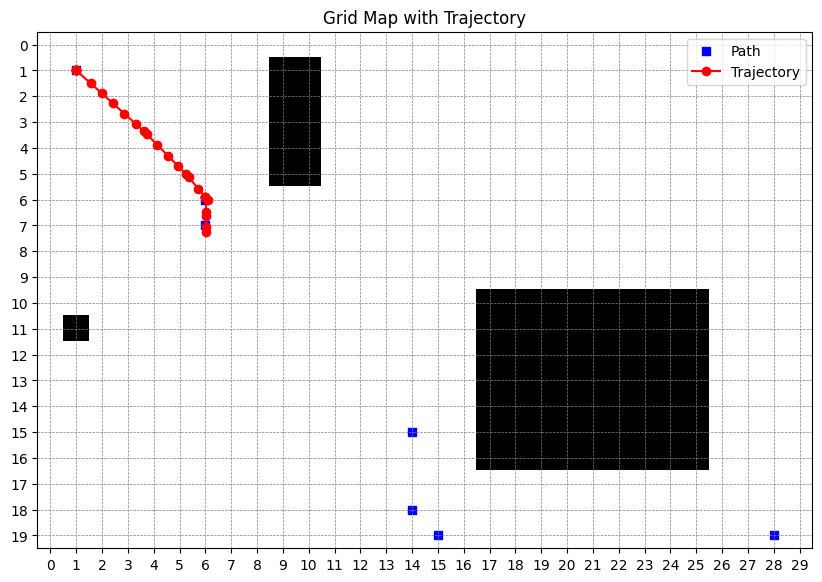

wl, wr:  7 -6
Position:  [6.020451821041883, 7.076159141276675]
position 0:  6.020451821041883
position 1:  7.076159141276675
Angle:  0.9175376618603945
Kalman update:  (602.0451821041883, 707.6159141276676, 0.9210386660206714)
Kalman position used:  [602.0451821041883, 707.6159141276676]
current objective:  3
objective:  [1400, 1500]  position:  [602.0451821041883, 707.6159141276676]
x_diff:  797.9548178958117  y_diff:  792.3840858723324  distance:  1124.5463222770638
my angle:  0.9210386660206714
waypoint angle:  0.7818953193016885
diff angle:  -0.13914334671898287
angleDistance:  -0.1391433467189831
Speed:  0.0 -0.5612114984332318
Kalman prediction:  (602.0451821041883, 707.6159141276676, 0.9210386660206714)
Kalman pos 0:  602.0451821041883
Kalman pos 1:  707.6159141276676
v, w  0 -0.5612114984332318
angle:  0.9210386660206714
New angle:  0.8368569412556867
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.86

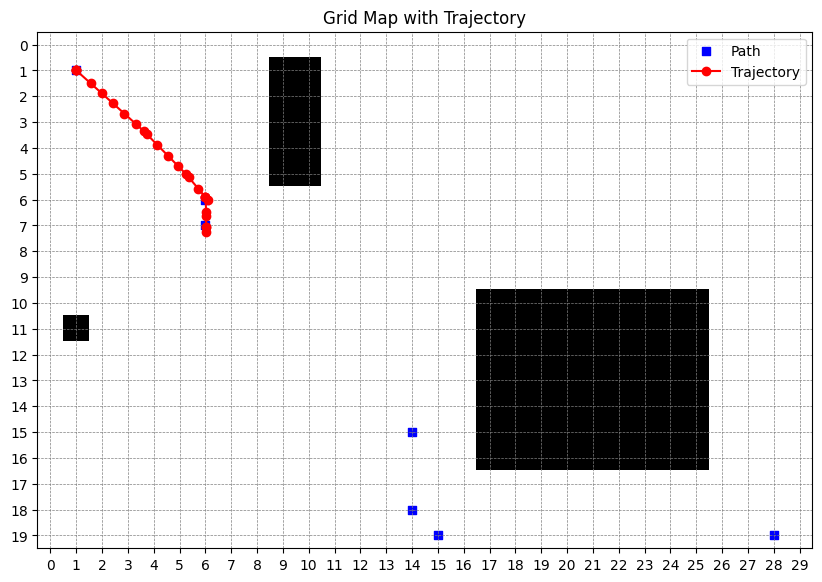

wl, wr:  3 -2
Position:  [6.020451821041883, 7.076159141276675]
position 0:  6.020451821041883
position 1:  7.076159141276675
Angle:  0.8368569412556867
Kalman update:  (602.0451821041883, 707.6159141276676, 0.8382755312290442)
Kalman position used:  [602.0451821041883, 707.6159141276676]
current objective:  3
objective:  [1400, 1500]  position:  [602.0451821041883, 707.6159141276676]
x_diff:  797.9548178958117  y_diff:  792.3840858723324  distance:  1124.5463222770638
my angle:  0.8382755312290442
waypoint angle:  0.7818953193016885
diff angle:  -0.05638021192735565
angleDistance:  -0.05638021192735554
Speed:  5.0 0
Kalman prediction:  (602.0589746962537, 707.6312483035899, 0.8383000842787386)
Kalman pos 0:  602.0451821041883
Kalman pos 1:  707.6159141276676
v, w  500 0
angle:  0.8382755312290442
New angle:  0.8382755312290442
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573963222938

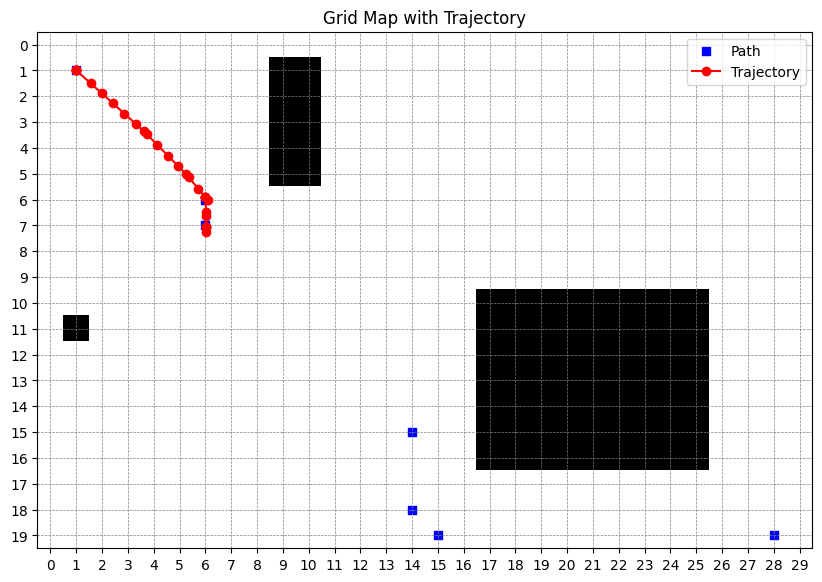

wl, wr:  58 52
Position:  [6.522011280964144, 7.633777387178376]
position 0:  6.522011280964144
position 1:  7.633777387178376
Angle:  0.8382755312290442
Kalman update:  (641.0663170818696, 751.1500683750338, 0.838275944985239)
Kalman position used:  [641.0663170818696, 751.1500683750338]
current objective:  3
objective:  [1400, 1500]  position:  [641.0663170818696, 751.1500683750338]
x_diff:  758.9336829181304  y_diff:  748.8499316249662  distance:  1066.187861102533
my angle:  0.838275944985239
waypoint angle:  0.7787104657314688
diff angle:  -0.059565479253770204
angleDistance:  -0.05956547925377009
Speed:  5.0 0
Kalman prediction:  (641.0663170818696, 751.1500683750338, 0.838275944985239)
Kalman pos 0:  641.0663170818696
Kalman pos 1:  751.1500683750338
v, w  500 0
angle:  0.838275944985239
New angle:  0.838275944985239
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573963222938, 3.

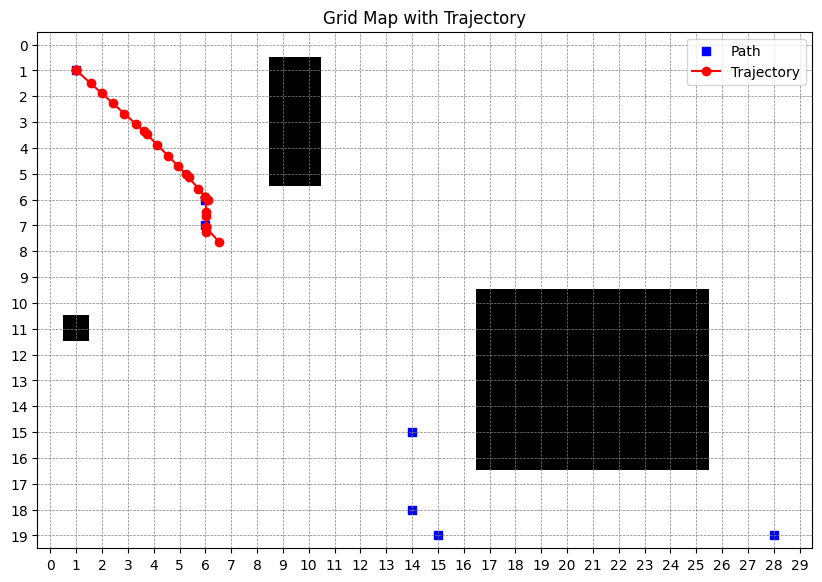

wl, wr:  58 52
Position:  [6.912222400022911, 8.069119137175324]
position 0:  6.912222400022911
position 1:  8.069119137175324
Angle:  0.838275944985239
Kalman update:  (680.1585590222612, 794.6244182876541, 0.838275944985239)
Kalman position used:  [680.1585590222612, 794.6244182876541]
current objective:  3
objective:  [1400, 1500]  position:  [680.1585590222612, 794.6244182876541]
x_diff:  719.8414409777388  y_diff:  705.3755817123459  distance:  1007.8325314381044
my angle:  0.838275944985239
waypoint angle:  0.7752485775431099
diff angle:  -0.06302736744212911
angleDistance:  -0.06302736744212911
Speed:  5.0 0
Kalman prediction:  (680.1585590222612, 794.6244182876541, 0.838275944985239)
Kalman pos 0:  680.1585590222612
Kalman pos 1:  794.6244182876541
v, w  500 0
angle:  0.838275944985239
New angle:  0.838275944985239
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573963222938, 3.7

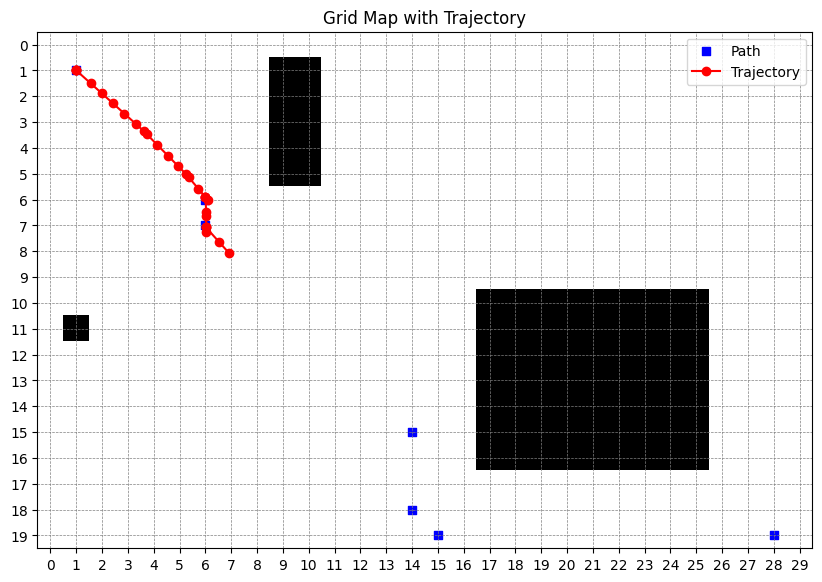

wl, wr:  58 52
Position:  [7.303144819426827, 8.503862636301527]
position 0:  7.303144819426827
position 1:  8.503862636301527
Angle:  0.838275944985239
Kalman update:  (719.2568665083382, 838.0938150930564, 0.838275944985239)
Kalman position used:  [719.2568665083382, 838.0938150930564]
current objective:  3
objective:  [1400, 1500]  position:  [719.2568665083382, 838.0938150930564]
x_diff:  680.7431334916618  y_diff:  661.9061849069436  distance:  949.4898690423776
my angle:  0.838275944985239
waypoint angle:  0.7713693976079
diff angle:  -0.06690654737733903
angleDistance:  -0.06690654737733892
Speed:  5.0 0
Kalman prediction:  (719.2931533745506, 838.134157738628, 0.8383405415190144)
Kalman pos 0:  719.2568665083382
Kalman pos 1:  838.0938150930564
v, w  500 0
angle:  0.838275944985239
New angle:  0.838275944985239
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573963222938, 3.73228

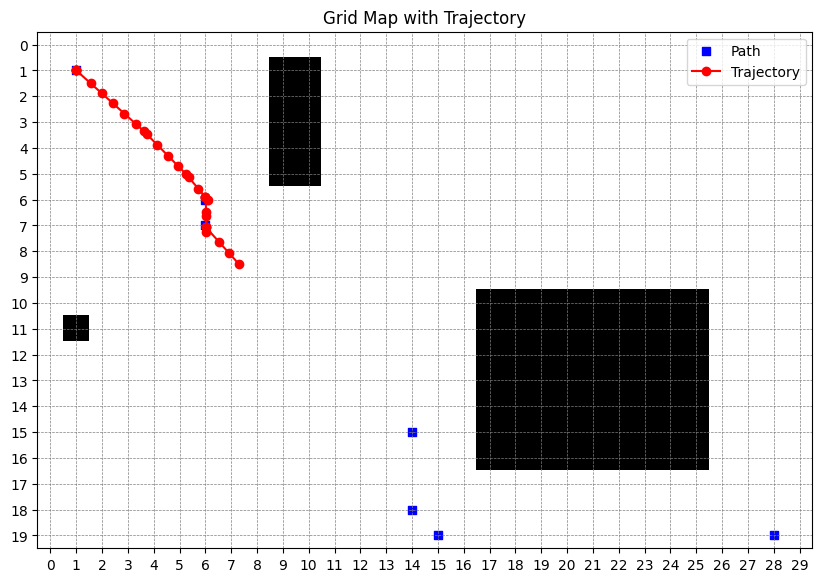

wl, wr:  58 52
Position:  [7.694127894287598, 8.938556604355549]
position 0:  7.694127894287598
position 1:  8.938556604355549
Angle:  0.838275944985239
Kalman update:  (758.3636754621314, 881.5716786142478, 0.8382770335349853)
Kalman position used:  [758.3636754621314, 881.5716786142478]
current objective:  3
objective:  [1400, 1500]  position:  [758.3636754621314, 881.5716786142478]
x_diff:  641.6363245378686  y_diff:  618.4283213857522  distance:  891.151368544348
my angle:  0.8382770335349853
waypoint angle:  0.7669821404545989
diff angle:  -0.07129489308038639
angleDistance:  -0.0712948930803865
Speed:  5.0 0
Kalman prediction:  (758.3636754621314, 881.5716786142478, 0.8382770335349853)
Kalman pos 0:  758.3636754621314
Kalman pos 1:  881.5716786142478
v, w  500 0
angle:  0.8382770335349853
New angle:  0.8382770335349853
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573963222938, 3

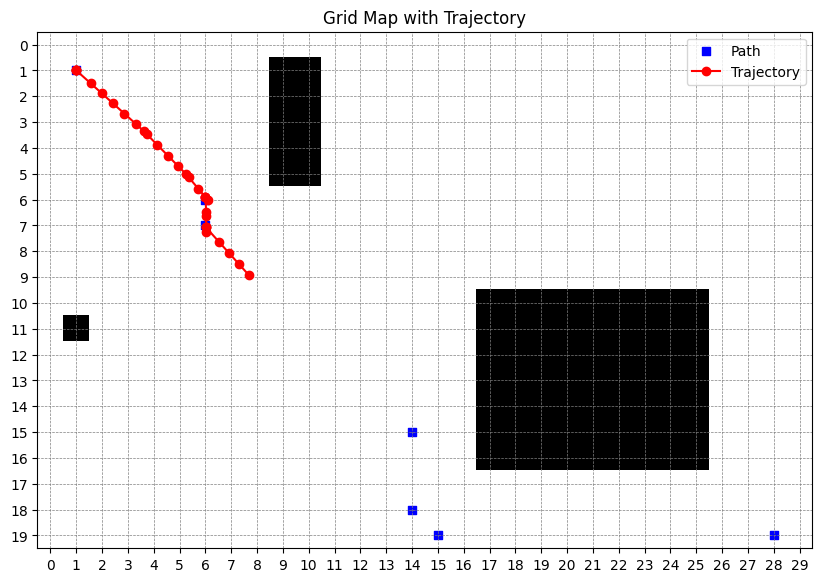

wl, wr:  58 52
Position:  [8.085195376829807, 9.373335785539306]
position 0:  8.085195376829807
position 1:  9.373335785539306
Angle:  0.8382770335349853
Kalman update:  (797.4624801358544, 925.0406538573011, 0.8382770335349853)
Kalman position used:  [797.4624801358544, 925.0406538573011]
current objective:  3
objective:  [1400, 1500]  position:  [797.4624801358544, 925.0406538573011]
x_diff:  602.5375198641456  y_diff:  574.9593461426989  distance:  832.8443507408065
my angle:  0.8382770335349853
waypoint angle:  0.7619814278099868
diff angle:  -0.0762956057249985
angleDistance:  -0.0762956057249986
Speed:  5.0 0
Kalman prediction:  (797.5112278308607, 925.0948501958917, 0.8383638124791741)
Kalman pos 0:  797.4624801358544
Kalman pos 1:  925.0406538573011
v, w  500 0
angle:  0.8382770335349853
New angle:  0.8382770335349853
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573963222938, 

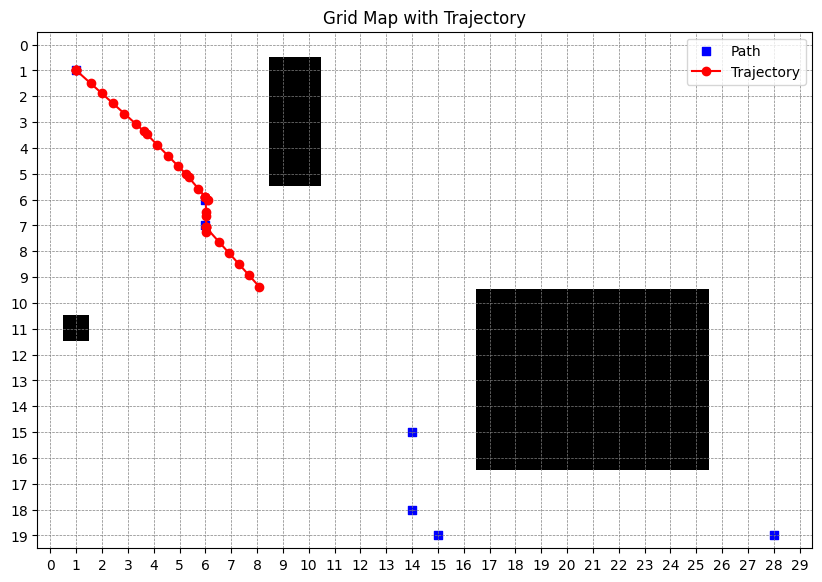

wl, wr:  58 52
Position:  [8.476183423567036, 9.808025537969838]
position 0:  8.476183423567036
position 1:  9.808025537969838
Angle:  0.8382770335349853
Kalman update:  (836.5720341733926, 968.5215744821637, 0.8382784958920523)
Kalman position used:  [836.5720341733926, 968.5215744821637]
current objective:  3
objective:  [1400, 1500]  position:  [836.5720341733926, 968.5215744821637]
x_diff:  563.4279658266074  y_diff:  531.4784255178363  distance:  774.5452791583117
my angle:  0.8382784958920523
waypoint angle:  0.756226284373676
diff angle:  -0.08205221151837627
angleDistance:  -0.08205221151837616
Speed:  5.0 0
Kalman prediction:  (836.6309711518498, 968.5870991769027, 0.8383834136133671)
Kalman pos 0:  836.5720341733926
Kalman pos 1:  968.5215744821637
v, w  500 0
angle:  0.8382784958920523
New angle:  0.8382784958920523
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573963222938,

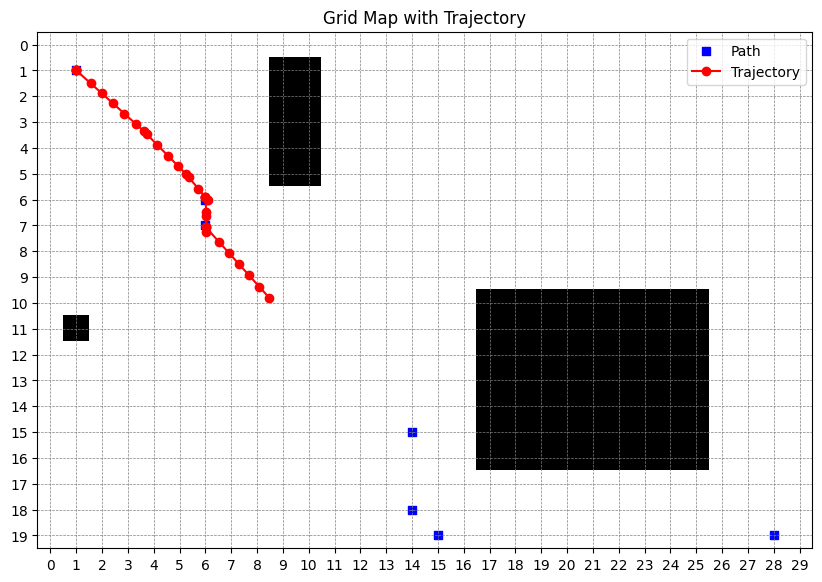

wl, wr:  58 52
Position:  [8.867278148503798, 10.242835477675664]
position 0:  8.867278148503798
position 1:  10.242835477675664
Angle:  0.8382784958920523
Kalman update:  (875.6837722484395, 1012.0050484631603, 0.838280263915075)
Kalman position used:  [875.6837722484395, 1012.0050484631603]
current objective:  3
objective:  [1400, 1500]  position:  [875.6837722484395, 1012.0050484631603]
x_diff:  524.3162277515605  y_diff:  487.9949515368397  distance:  716.2726990532788
my angle:  0.838280263915075
waypoint angle:  0.7495339913819375
diff angle:  -0.0887462725331375
angleDistance:  -0.08874627253313738
Speed:  5.0 0
Kalman prediction:  (875.6937447156374, 1012.0161356483135, 0.838298016616661)
Kalman pos 0:  875.6837722484395
Kalman pos 1:  1012.0050484631603
v, w  500 0
angle:  0.838280263915075
New angle:  0.838280263915075
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.29757396322293

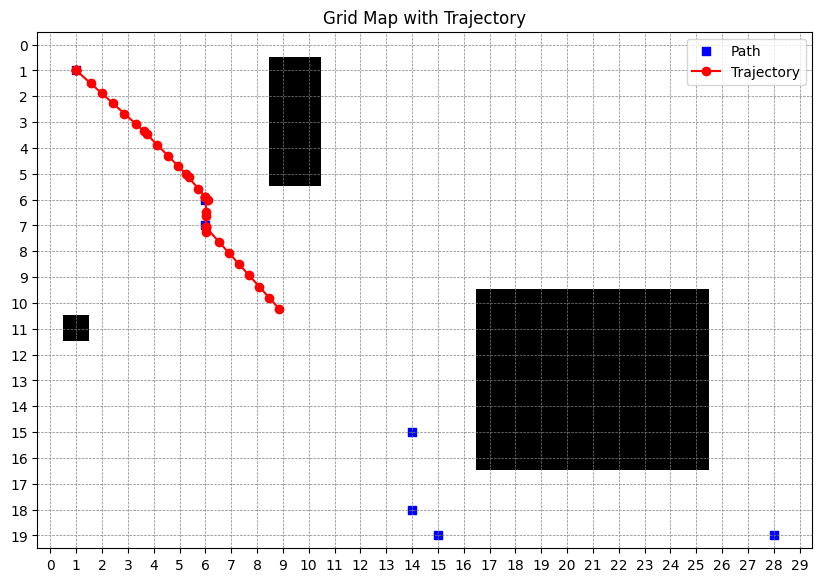

wl, wr:  58 52
Position:  [9.258394543368958, 10.677671104250507]
position 0:  9.258394543368958
position 1:  10.677671104250507
Angle:  0.838280263915075
Kalman update:  (914.784639398093, 1055.476590300591, 0.8382805630750714)
Kalman position used:  [914.784639398093, 1055.476590300591]
current objective:  3
objective:  [1400, 1500]  position:  [914.784639398093, 1055.476590300591]
x_diff:  485.21536060190704  y_diff:  444.52340969940906  distance:  658.053955185156
my angle:  0.8382805630750714
waypoint angle:  0.7416589976920677
diff angle:  -0.0966215653830037
angleDistance:  -0.09662156538300382
Speed:  5.0 0
Kalman prediction:  (914.8513419025946, 1055.550748826048, 0.838399305010021)
Kalman pos 0:  914.784639398093
Kalman pos 1:  1055.476590300591
v, w  500 0
angle:  0.8382805630750714
New angle:  0.8382805630750714
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573963222938, 3.

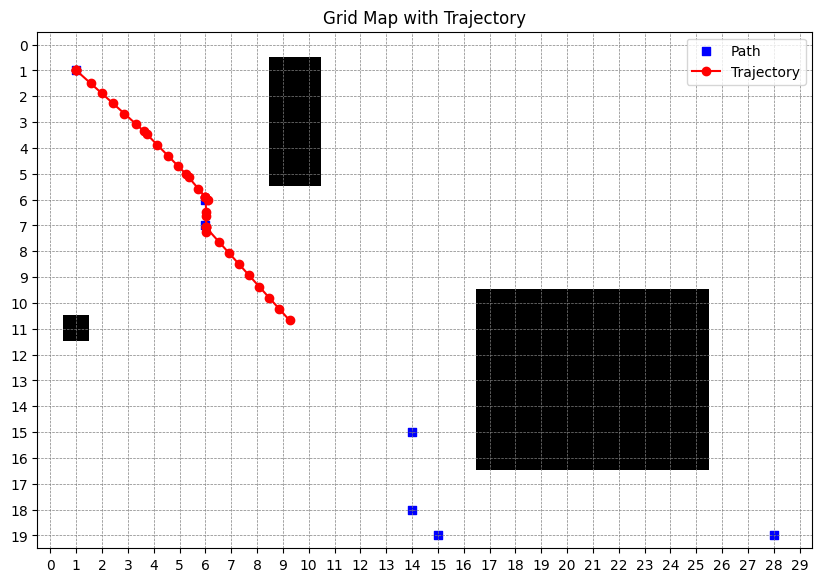

wl, wr:  58 52
Position:  [9.649403048047686, 11.112386672670524]
position 0:  9.649403048047686
position 1:  11.112386672670524
Angle:  0.8382805630750714
Kalman update:  (953.8979988153781, 1098.9620491326466, 0.8382825640570993)
Kalman position used:  [953.8979988153781, 1098.9620491326466]
current objective:  3
objective:  [1400, 1500]  position:  [953.8979988153781, 1098.9620491326466]
x_diff:  446.10200118462194  y_diff:  401.0379508673534  distance:  599.865346137623
my angle:  0.8382825640570993
waypoint angle:  0.7322527352220782
diff angle:  -0.1060298288350211
angleDistance:  -0.10602982883502099
Speed:  0.0 -0.42765364296791797
Kalman prediction:  (953.8981067963076, 1098.962169184192, 0.8383673353093012)
Kalman pos 0:  953.8979988153781
Kalman pos 1:  1098.9620491326466
v, w  0 -0.42765364296791797
angle:  0.8382825640570993
New angle:  0.7741345176119117
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.42775886241655

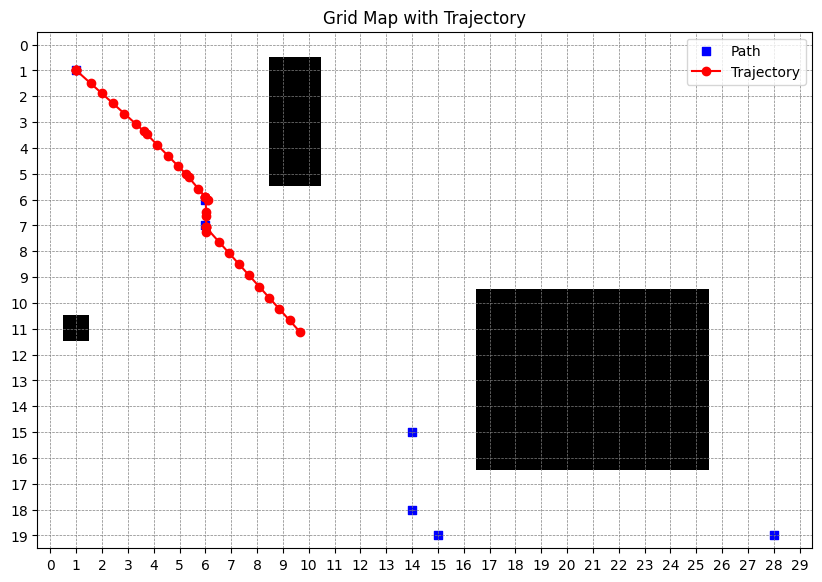

wl, wr:  2 -2
Position:  [9.53897998815378, 10.989620491326466]
position 0:  9.53897998815378
position 1:  10.989620491326466
Angle:  0.7741345176119117
Kalman update:  (953.8980226201899, 1098.9620755984788, 0.7752169381895418)
Kalman position used:  [953.8980226201899, 1098.9620755984788]
current objective:  3
objective:  [1400, 1500]  position:  [953.8980226201899, 1098.9620755984788]
x_diff:  446.10197737981014  y_diff:  401.0379244015212  distance:  599.8653107410503
my angle:  0.7752169381895418
waypoint angle:  0.73225272894196
diff angle:  -0.04296420924758182
angleDistance:  -0.04296420924758193
Speed:  5.0 0
Kalman prediction:  (953.925652799027, 1098.989148810529, 0.7752629895508859)
Kalman pos 0:  953.8980226201899
Kalman pos 1:  1098.9620755984788
v, w  500 0
angle:  0.7752169381895418
New angle:  0.7752169381895418
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.29757396322293

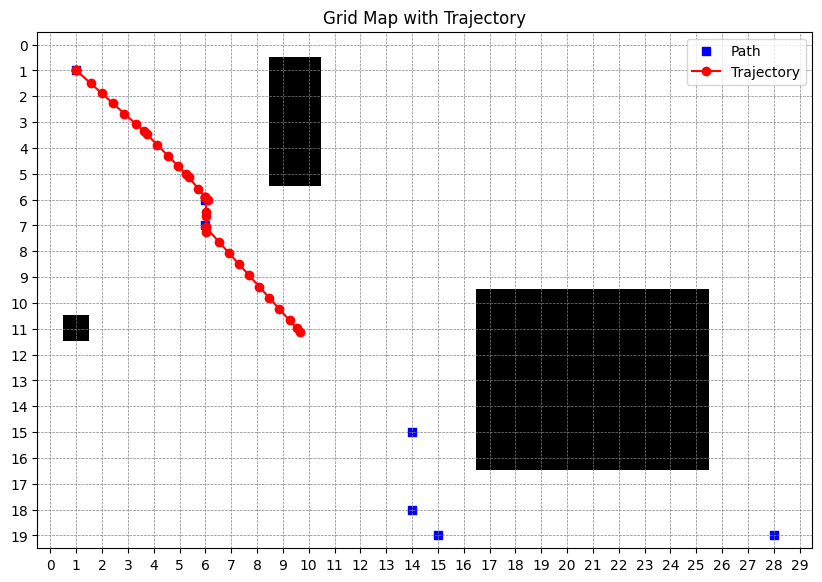

wl, wr:  58 52
Position:  [10.074682142782477, 11.514524039049293]
position 0:  10.074682142782477
position 1:  11.514524039049293
Angle:  0.7752169381895418
Kalman update:  (995.6179019167753, 1139.9307370273634, 0.7752177142249539)
Kalman position used:  [995.6179019167753, 1139.9307370273634]
current objective:  3
objective:  [1400, 1500]  position:  [995.6179019167753, 1139.9307370273634]
x_diff:  404.3820980832247  y_diff:  360.0692629726366  distance:  541.4561435498248
my angle:  0.7752177142249539
waypoint angle:  0.7274961116515551
diff angle:  -0.04772160257339875
angleDistance:  -0.04772160257339886
Speed:  5.0 0
Kalman prediction:  (995.6708702175728, 1139.982637678244, 0.7753059968317724)
Kalman pos 0:  995.6179019167753
Kalman pos 1:  1139.9307370273634
v, w  500 0
angle:  0.7752177142249539
New angle:  0.7752177142249539
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.2975739

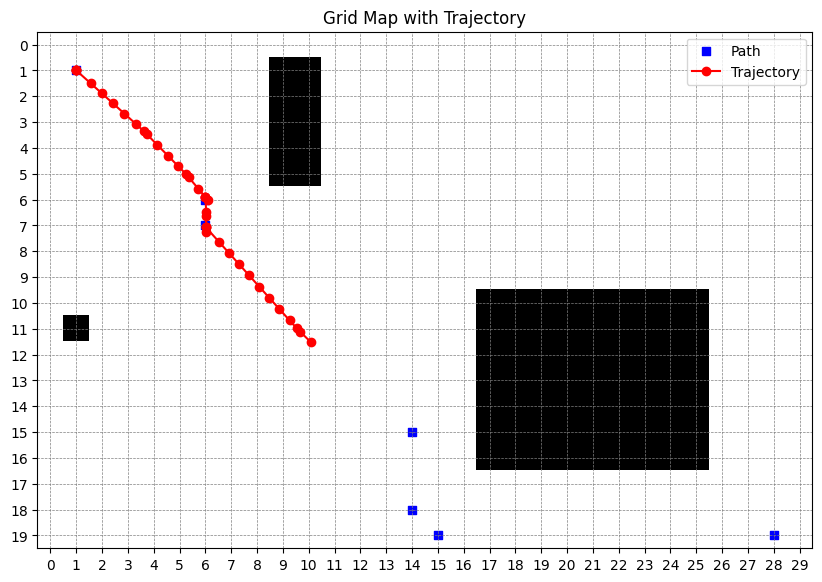

wl, wr:  58 52
Position:  [10.491880528404636, 11.924211069061636]
position 0:  10.491880528404636
position 1:  11.924211069061636
Angle:  0.7752177142249539
Kalman update:  (1037.386119078107, 1180.864611668711, 0.775219201921021)
Kalman position used:  [1037.386119078107, 1180.864611668711]
current objective:  3
objective:  [1400, 1500]  position:  [1037.386119078107, 1180.864611668711]
x_diff:  362.61388092189304  y_diff:  319.13538833128905  distance:  483.04888233241934
my angle:  0.775219201921021
waypoint angle:  0.7217095139384432
diff angle:  -0.053509687982577825
angleDistance:  -0.0535096879825776
Speed:  5.0 0
Kalman prediction:  (1037.4239291404235, 1180.9016597267864, 0.7752822202863608)
Kalman pos 0:  1037.386119078107
Kalman pos 1:  1180.864611668711
v, w  500 0
angle:  0.775219201921021
New angle:  0.775219201921021
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.2975739632

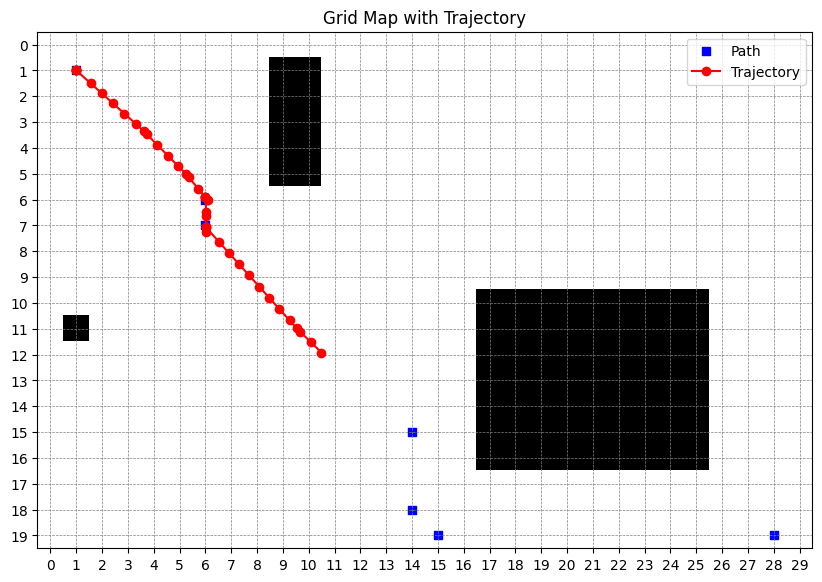

wl, wr:  58 52
Position:  [10.90956191912019, 12.33355061243556]
position 0:  10.90956191912019
position 1:  12.33355061243556
Angle:  0.775219201921021
Kalman update:  (1079.154475514503, 1221.7918246275533, 0.7752202638762311)
Kalman position used:  [1079.154475514503, 1221.7918246275533]
current objective:  3
objective:  [1400, 1500]  position:  [1079.154475514503, 1221.7918246275533]
x_diff:  320.845524485497  y_diff:  278.2081753724467  distance:  424.6665037725953
my angle:  0.7752202638762311
waypoint angle:  0.7143434823183866
diff angle:  -0.060876781557844484
angleDistance:  -0.060876781557844595
Speed:  5.0 0
Kalman prediction:  (1079.1817804956247, 1221.818579375188, 0.7752657733771682)
Kalman pos 0:  1079.154475514503
Kalman pos 1:  1221.7918246275533
v, w  500 0
angle:  0.7752202638762311
New angle:  0.7752202638762311
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.2975739632

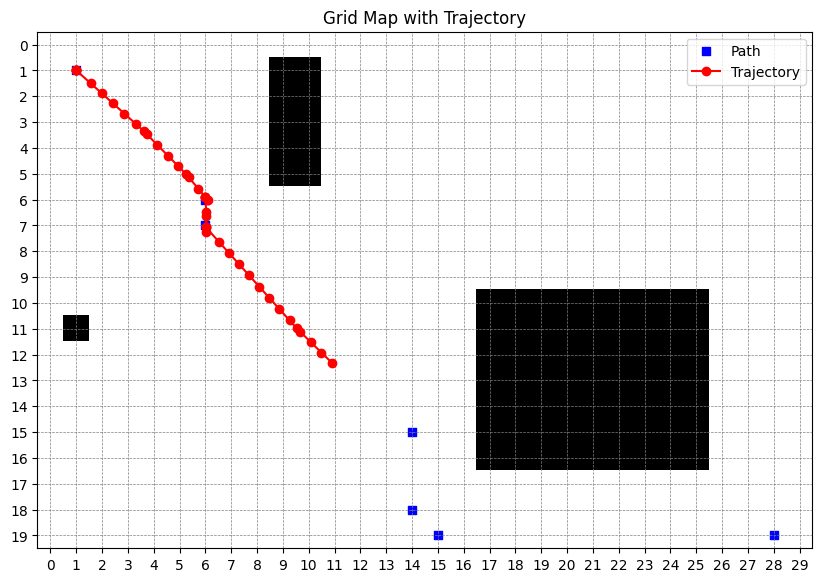

wl, wr:  58 52
Position:  [11.327244926058784, 12.742823310913868]
position 0:  11.327244926058784
position 1:  12.742823310913868
Angle:  0.7752202638762311
Kalman update:  (1120.9207677005818, 1262.7165196151593, 0.7752210307804719)
Kalman position used:  [1120.9207677005818, 1262.7165196151593]
current objective:  3
objective:  [1400, 1500]  position:  [1120.9207677005818, 1262.7165196151593]
x_diff:  279.0792322994182  y_diff:  237.2834803848407  distance:  366.317714510745
my angle:  0.7752210307804719
waypoint angle:  0.7046316204618159
diff angle:  -0.07058941031865595
angleDistance:  -0.07058941031865595
Speed:  5.0 0
Kalman prediction:  (1120.9650839076633, 1262.75994285542, 0.7752948931272078)
Kalman pos 0:  1120.9207677005818
Kalman pos 1:  1262.7165196151593
v, w  500 0
angle:  0.7752210307804719
New angle:  0.7752210307804719
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.2975

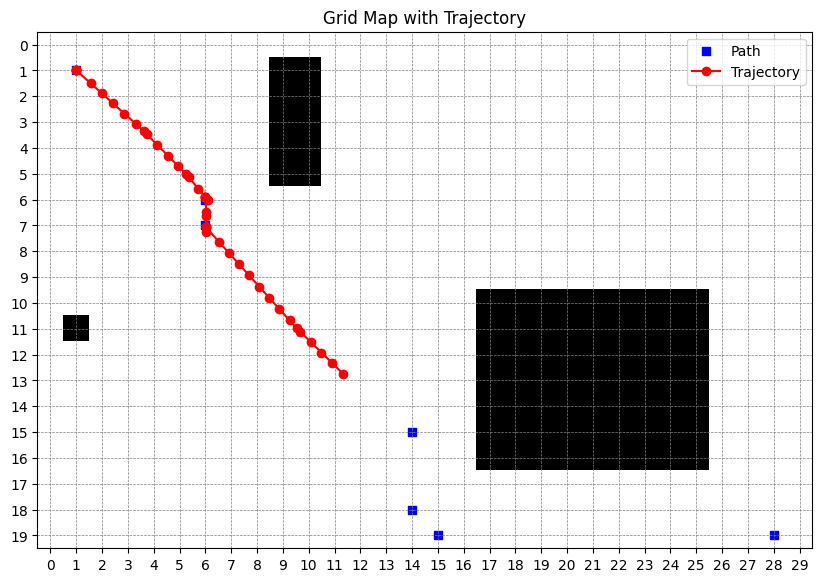

wl, wr:  58 52
Position:  [11.744907445367494, 13.152070671620507]
position 0:  11.744907445367494
position 1:  13.152070671620507
Angle:  0.7752210307804719
Kalman update:  (1162.6908031971345, 1303.6448966493376, 0.7752222754732455)
Kalman position used:  [1162.6908031971345, 1303.6448966493376]
current objective:  3
objective:  [1400, 1500]  position:  [1162.6908031971345, 1303.6448966493376]
x_diff:  237.30919680286547  y_diff:  196.35510335066238  distance:  308.01133339387115
my angle:  0.7752222754732455
waypoint angle:  0.6912400960347138
diff angle:  -0.0839821794385317
angleDistance:  -0.08398217943853181
Speed:  5.0 0
Kalman prediction:  (1162.6908031971345, 1303.6448966493376, 0.7752222754732455)
Kalman pos 0:  1162.6908031971345
Kalman pos 1:  1303.6448966493376
v, w  500 0
angle:  0.7752222754732455
New angle:  0.7752222754732455
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3

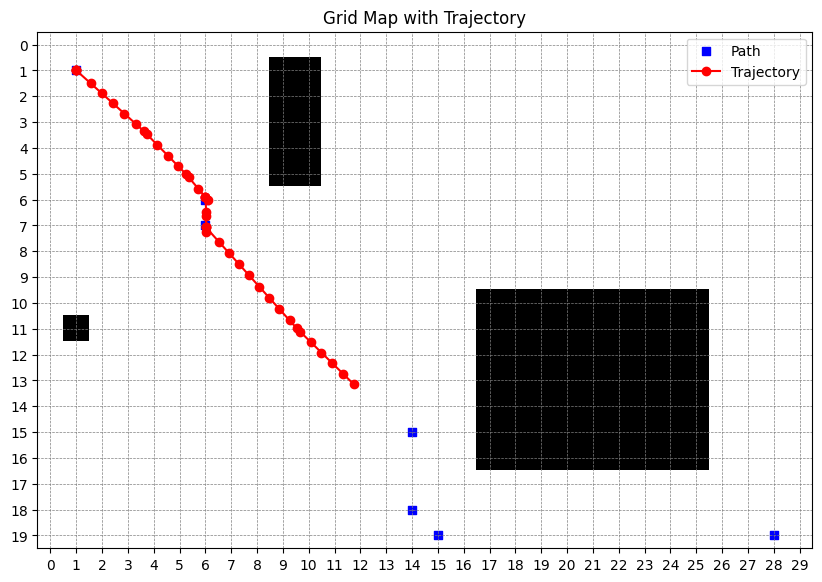

wl, wr:  58 52
Position:  [12.162607146986554, 13.561355108743514]
position 0:  12.162607146986554
position 1:  13.561355108743514
Angle:  0.7752222754732455
Kalman update:  (1204.451020479268, 1344.563750413128, 0.7752222754732455)
Kalman position used:  [1204.451020479268, 1344.563750413128]
current objective:  3
objective:  [1400, 1500]  position:  [1204.451020479268, 1344.563750413128]
x_diff:  195.54897952073202  y_diff:  155.436249586872  distance:  249.79958181957
my angle:  0.7752222754732455
waypoint angle:  0.6716057841139839
diff angle:  -0.10361649135926165
angleDistance:  -0.10361649135926143
Speed:  0.0 -0.4179198484823544
Kalman prediction:  (1204.451020479268, 1344.563750413128, 0.7752222754732455)
Kalman pos 0:  1204.451020479268
Kalman pos 1:  1344.563750413128
v, w  0 -0.4179198484823544
angle:  0.7752222754732455
New angle:  0.7125342982008923
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2

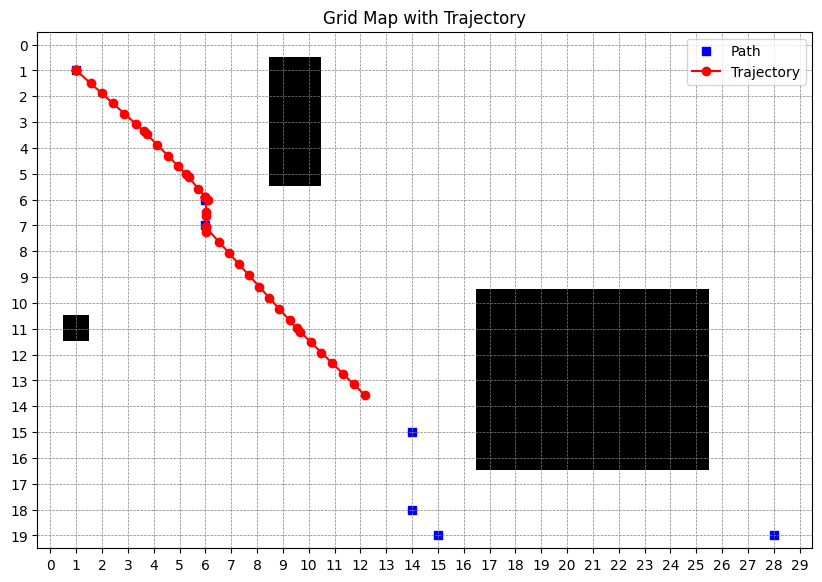

wl, wr:  2 -2
Position:  [12.04451020479268, 13.44563750413128]
position 0:  12.04451020479268
position 1:  13.44563750413128
Angle:  0.7125342982008923
Kalman update:  (1204.451020479268, 1344.563750413128, 0.7135906858700318)
Kalman position used:  [1204.451020479268, 1344.563750413128]
current objective:  3
objective:  [1400, 1500]  position:  [1204.451020479268, 1344.563750413128]
x_diff:  195.54897952073202  y_diff:  155.436249586872  distance:  249.79958181957
my angle:  0.7135906858700318
waypoint angle:  0.6716057841139839
diff angle:  -0.041984901756047965
angleDistance:  -0.041984901756047854
Speed:  5.0 0
Kalman prediction:  (1204.4946752008407, 1344.601546298603, 0.713659427635921)
Kalman pos 0:  1204.451020479268
Kalman pos 1:  1344.563750413128
v, w  500 0
angle:  0.7135906858700318
New angle:  0.7135906858700318
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573963222938,

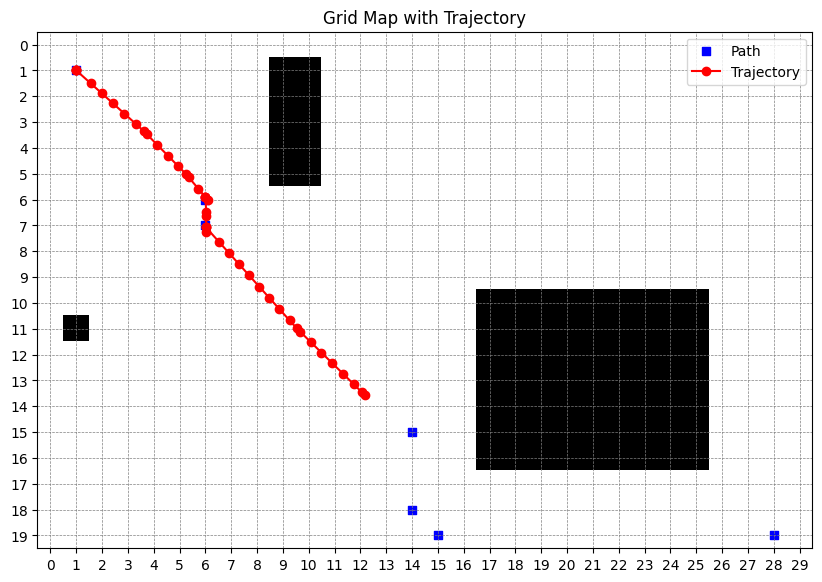

wl, wr:  58 52
Position:  [12.61152255123616, 13.936551955925744]
position 0:  12.61152255123616
position 1:  13.936551955925744
Angle:  0.7135906858700318
Kalman update:  (1248.619071264647, 1382.8869437390156, 0.7135918442732376)
Kalman position used:  [1248.619071264647, 1382.8869437390156]
current objective:  3
objective:  [1400, 1500]  position:  [1248.619071264647, 1382.8869437390156]
x_diff:  151.3809287353531  y_diff:  117.11305626098442  distance:  191.39397464801905
my angle:  0.7135918442732376
waypoint angle:  0.6584545284655037
diff angle:  -0.055137315807733955
angleDistance:  -0.055137315807733955
Speed:  5.0 0
Kalman prediction:  (1248.6504971268926, 1382.914152046114, 0.7136413296749113)
Kalman pos 0:  1248.619071264647
Kalman pos 1:  1382.8869437390156
v, w  500 0
angle:  0.7135918442732376
New angle:  0.7135918442732376
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.2975

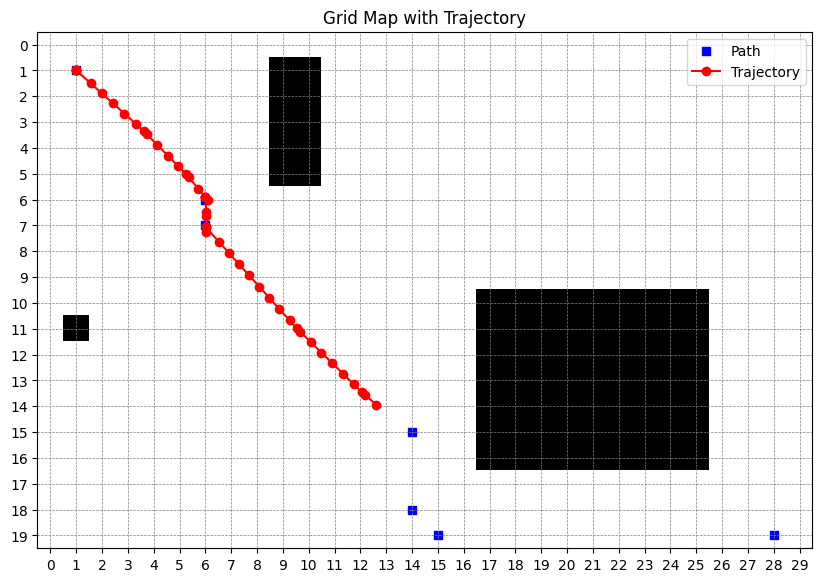

wl, wr:  58 52
Position:  [13.053202490412694, 14.319784546013208]
position 0:  13.053202490412694
position 1:  14.319784546013208
Angle:  0.7135918442732376
Kalman update:  (1292.8236413084105, 1421.165950985144, 0.7135926781774471)
Kalman position used:  [1292.8236413084105, 1421.165950985144]
current objective:  3
objective:  [1400, 1500]  position:  [1292.8236413084105, 1421.165950985144]
x_diff:  107.17635869158948  y_diff:  78.83404901485596  distance:  133.04728161997508
my angle:  0.7135926781774471
waypoint angle:  0.6341916822611962
diff angle:  -0.07940099591625094
angleDistance:  -0.07940099591625094
Speed:  5.0 0
Kalman prediction:  (1292.8236413084105, 1421.165950985144, 0.7135926781774471)
Kalman pos 0:  1292.8236413084105
Kalman pos 1:  1421.165950985144
v, w  500 0
angle:  0.7135926781774471
New angle:  0.7135926781774471
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.2975

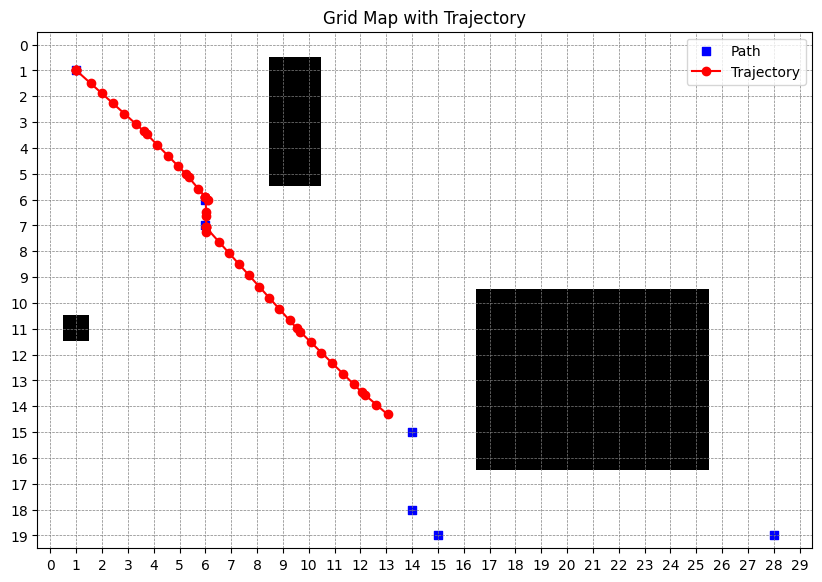

wl, wr:  58 52
Position:  [13.495247781473958, 14.70257509130783]
position 0:  13.495247781473958
position 1:  14.70257509130783
Angle:  0.7135926781774471
Kalman update:  (1337.0244977454336, 1459.4354162314507, 0.7135926781774471)
Kalman position used:  [1337.0244977454336, 1459.4354162314507]
current objective:  3
objective:  [1400, 1500]  position:  [1337.0244977454336, 1459.4354162314507]
x_diff:  62.975502254566436  y_diff:  40.564583768549255  distance:  74.90927406223179
my angle:  0.7135926781774471
waypoint angle:  0.5722395554148699
diff angle:  -0.14135312276257717
angleDistance:  -0.14135312276257705
Speed:  0.0 -0.5701242618090608
Kalman prediction:  (1337.0246534599044, 1459.4355510482537, 0.7137008110584636)
Kalman pos 0:  1337.0244977454336
Kalman pos 1:  1459.4354162314507
v, w  0 -0.5701242618090608
angle:  0.7135926781774471
New angle:  0.6280740389060879
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588

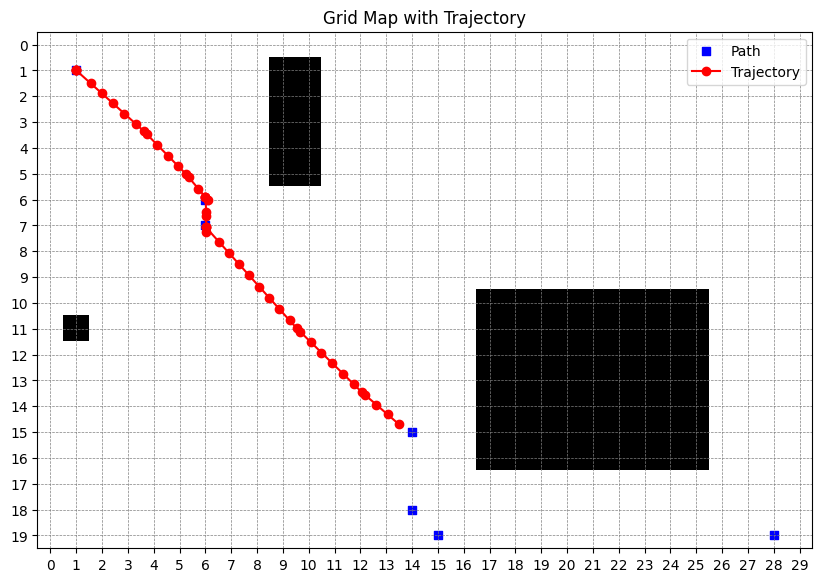

wl, wr:  3 -2
Position:  [13.370244977454336, 14.594354162314508]
position 0:  13.370244977454336
position 1:  14.594354162314508
Angle:  0.6280740389060879
Kalman update:  (1337.024532073361, 1459.4354459522613, 0.62951698012362)
Kalman position used:  [1337.024532073361, 1459.4354459522613]
current objective:  3
objective:  [1400, 1500]  position:  [1337.024532073361, 1459.4354459522613]
x_diff:  62.97546792663911  y_diff:  40.56455404773874  distance:  74.90922910877583
my angle:  0.62951698012362
waypoint angle:  0.5722394700199186
diff angle:  -0.05727751010370141
angleDistance:  -0.05727751010370152
Speed:  5.0 0
Kalman prediction:  (1337.1155860652862, 1459.5017674211472, 0.6296510838011096)
Kalman pos 0:  1337.024532073361
Kalman pos 1:  1459.4354459522613
v, w  500 0
angle:  0.62951698012362
New angle:  0.62951698012362
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.29757396322293

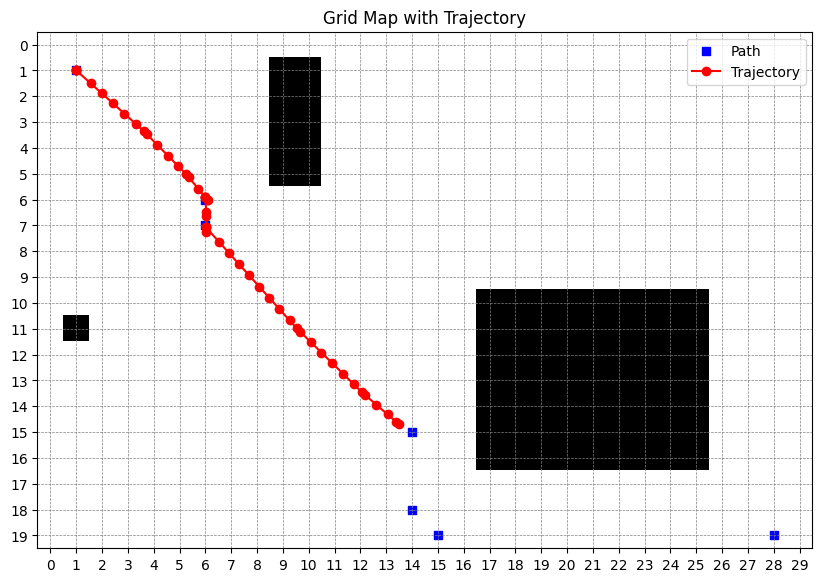

wl, wr:  58 52
Position:  [13.976479307735747, 15.035920256435702]
position 0:  13.976479307735747
position 1:  15.035920256435702
Angle:  0.62951698012362
Kalman update:  (1384.2496120650942, 1493.93844700944, 0.6295192399743513)
Kalman position used:  [1384.2496120650942, 1493.93844700944]
current objective:  3
objective:  [1400, 1500]  position:  [1384.2496120650942, 1493.93844700944]
x_diff:  15.750387934905802  y_diff:  6.061552990559903  distance:  16.876526442292324
Next objective:  4
x_diff:  15.750387934905802  y_diff:  306.0615529905599  distance:  306.4665543564148
my angle:  0.6295192399743513
waypoint angle:  1.5193801786833292
diff angle:  0.8898609387089779
angleDistance:  0.8898609387089778
Speed:  0.0 3.14
Kalman prediction:  (1384.2490315166035, 1493.9380241503134, 0.6291421721269369)
Kalman pos 0:  1384.2496120650942
Kalman pos 1:  1493.93844700944
v, w  0 3.14
angle:  0.6295192399743513
New angle:  1.1005192399743513
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.999

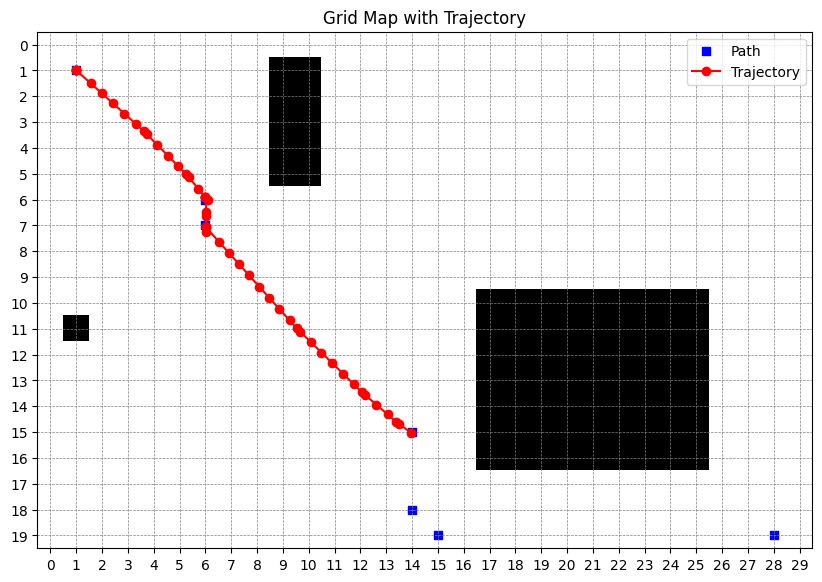

wl, wr:  -16 15
Position:  [13.842496120650942, 14.939384470094401]
position 0:  13.842496120650942
position 1:  14.939384470094401
Angle:  1.1005192399743513
Kalman update:  (1384.2494840387506, 1493.9383538428935, 1.0925758201408202)
Kalman position used:  [1384.2494840387506, 1493.9383538428935]
current objective:  4
objective:  [1400, 1800]  position:  [1384.2494840387506, 1493.9383538428935]
x_diff:  15.750515961249448  y_diff:  306.06164615710645  distance:  306.46665397958617
my angle:  1.0925758201408202
waypoint angle:  1.5193797771094608
diff angle:  0.4268039569686406
angleDistance:  0.4268039569686408
Speed:  0.0 1.7214426264401848
Kalman prediction:  (1384.2494840387506, 1493.9383538428935, 1.0925758201408202)
Kalman pos 0:  1384.2494840387506
Kalman pos 1:  1493.9383538428935
v, w  0 1.7214426264401848
angle:  1.0925758201408202
New angle:  1.350792214106848
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624

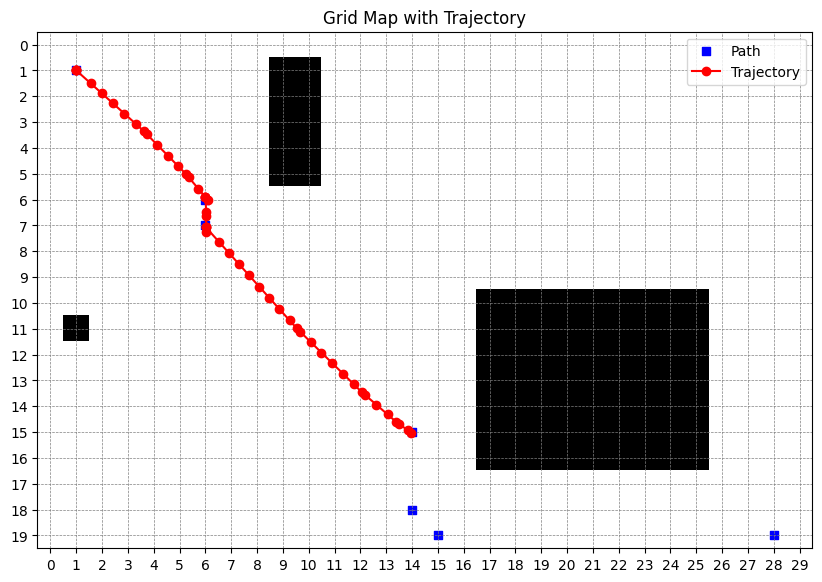

wl, wr:  -9 8
Position:  [13.842494840387506, 14.939383538428935]
position 0:  13.842494840387506
position 1:  14.939383538428935
Angle:  1.350792214106848
Kalman update:  (1384.2494840387506, 1493.9383538428935, 1.3464408755181059)
Kalman position used:  [1384.2494840387506, 1493.9383538428935]
current objective:  4
objective:  [1400, 1800]  position:  [1384.2494840387506, 1493.9383538428935]
x_diff:  15.750515961249448  y_diff:  306.06164615710645  distance:  306.46665397958617
my angle:  1.3464408755181059
waypoint angle:  1.5193797771094608
diff angle:  0.17293890159135494
angleDistance:  0.17293890159135472
Speed:  0.0 0.6975202364184641
Kalman prediction:  (1384.2494840387506, 1493.9383538428935, 1.3464408755181059)
Kalman pos 0:  1384.2494840387506
Kalman pos 1:  1493.9383538428935
v, w  0 0.6975202364184641
angle:  1.3464408755181059
New angle:  1.4510689109808754
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624

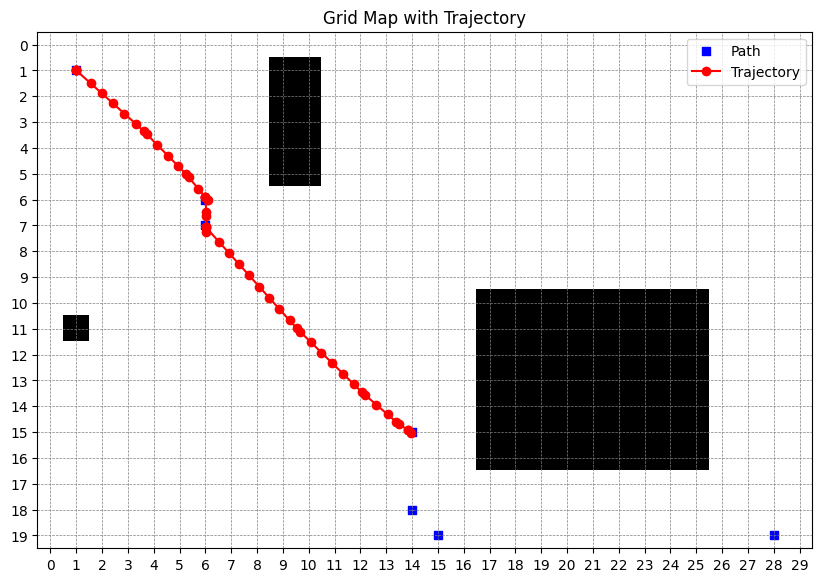

wl, wr:  -3 3
Position:  [13.842494840387506, 14.939383538428935]
position 0:  13.842494840387506
position 1:  14.939383538428935
Angle:  1.4510689109808754
Kalman update:  (1384.2494840387506, 1493.9383538428935, 1.449305769604835)
Kalman position used:  [1384.2494840387506, 1493.9383538428935]
current objective:  4
objective:  [1400, 1800]  position:  [1384.2494840387506, 1493.9383538428935]
x_diff:  15.750515961249448  y_diff:  306.06164615710645  distance:  306.46665397958617
my angle:  1.449305769604835
waypoint angle:  1.5193797771094608
diff angle:  0.07007400750462578
angleDistance:  0.07007400750462578
Speed:  5.0 0
Kalman prediction:  (1384.2494840387506, 1493.9383538428935, 1.449305769604835)
Kalman pos 0:  1384.2494840387506
Kalman pos 1:  1493.9383538428935
v, w  500 0
angle:  1.449305769604835
New angle:  1.449305769604835
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573

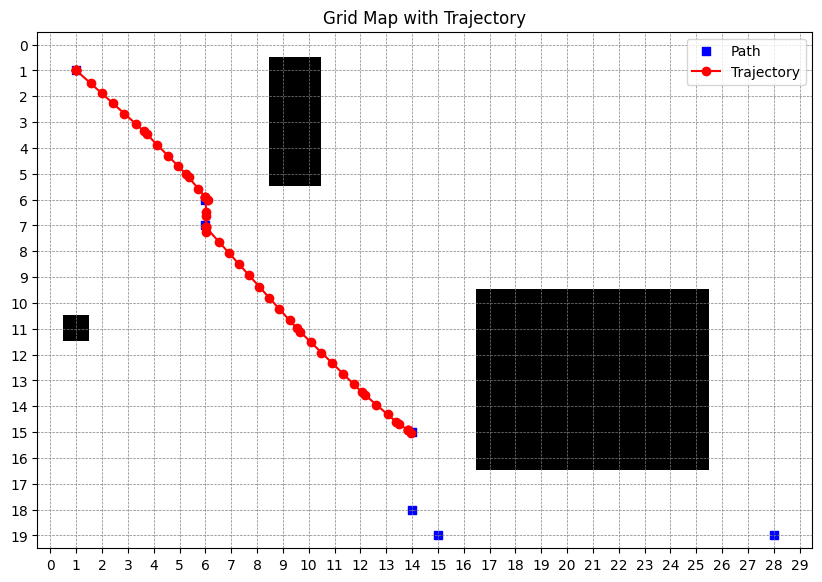

wl, wr:  58 52
Position:  [13.933388774241672, 15.683855359781841]
position 0:  13.933388774241672
position 1:  15.683855359781841
Angle:  1.449305769604835
Kalman update:  (1391.4568130960865, 1551.9465021907615, 1.449305769604835)
Kalman position used:  [1391.4568130960865, 1551.9465021907615]
current objective:  4
objective:  [1400, 1800]  position:  [1391.4568130960865, 1551.9465021907615]
x_diff:  8.543186903913465  y_diff:  248.05349780923848  distance:  248.20057175170462
my angle:  1.449305769604835
waypoint angle:  1.5363690299664412
diff angle:  0.08706326036160617
angleDistance:  0.08706326036160617
Speed:  5.0 0
Kalman prediction:  (1391.4614087837836, 1551.9841434264872, 1.4493509133499973)
Kalman pos 0:  1391.4568130960865
Kalman pos 1:  1551.9465021907615
v, w  500 0
angle:  1.449305769604835
New angle:  1.449305769604835
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573

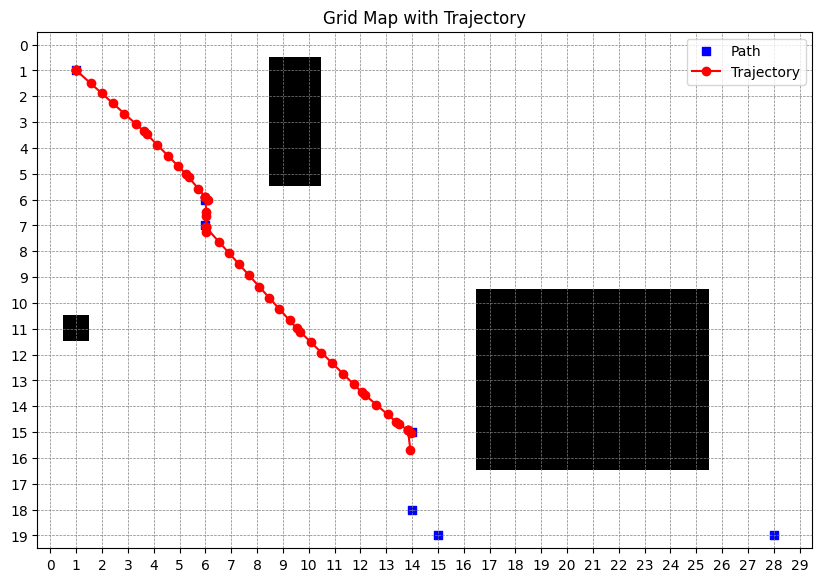

wl, wr:  58 52
Position:  [14.005462064815033, 16.26393684326052]
position 0:  14.005462064815033
position 1:  16.26393684326052
Angle:  1.449305769604835
Kalman update:  (1398.5537211342146, 1609.9879685530568, 1.4493065303455352)
Kalman position used:  [1398.5537211342146, 1609.9879685530568]
current objective:  4
objective:  [1400, 1800]  position:  [1398.5537211342146, 1609.9879685530568]
x_diff:  1.4462788657854162  y_diff:  190.01203144694318  distance:  190.01753555172678
my angle:  1.4493065303455352
waypoint angle:  1.563184961737474
diff angle:  0.11387843139193876
angleDistance:  0.11387843139193876
Speed:  0.0 0.45930967328081973
Kalman prediction:  (1398.5537211342146, 1609.9879685530568, 1.4493065303455352)
Kalman pos 0:  1398.5537211342146
Kalman pos 1:  1609.9879685530568
v, w  0 0.45930967328081973
angle:  1.4493065303455352
New angle:  1.5182029813376583
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624

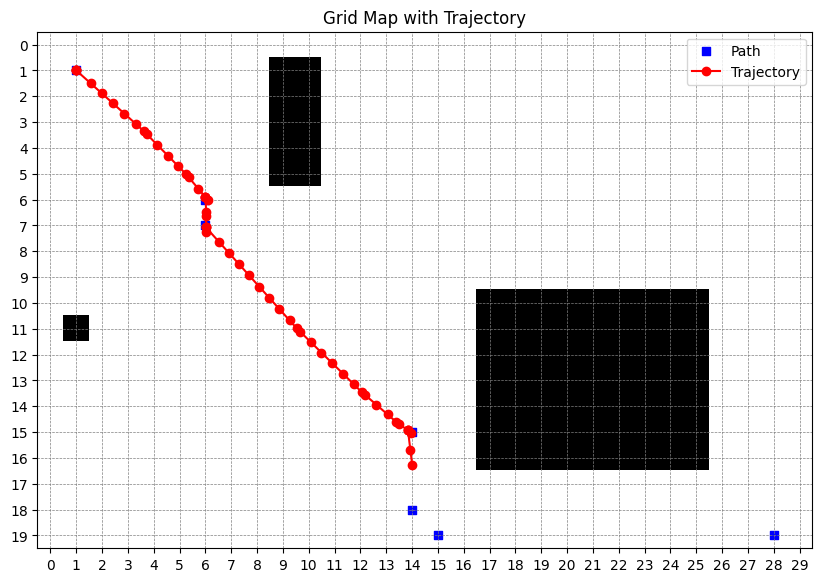

wl, wr:  -2 2
Position:  [13.985537211342146, 16.099879685530567]
position 0:  13.985537211342146
position 1:  16.099879685530567
Angle:  1.5182029813376583
Kalman update:  (1398.5537211342146, 1609.9879685530568, 1.5170419714527907)
Kalman position used:  [1398.5537211342146, 1609.9879685530568]
current objective:  4
objective:  [1400, 1800]  position:  [1398.5537211342146, 1609.9879685530568]
x_diff:  1.4462788657854162  y_diff:  190.01203144694318  distance:  190.01753555172678
my angle:  1.5170419714527907
waypoint angle:  1.563184961737474
diff angle:  0.04614299028468327
angleDistance:  0.04614299028468327
Speed:  5.0 0
Kalman prediction:  (1398.5550239849122, 1610.0121823227487, 1.5170708390659762)
Kalman pos 0:  1398.5537211342146
Kalman pos 1:  1609.9879685530568
v, w  500 0
angle:  1.5170419714527907
New angle:  1.5170419714527907
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.29

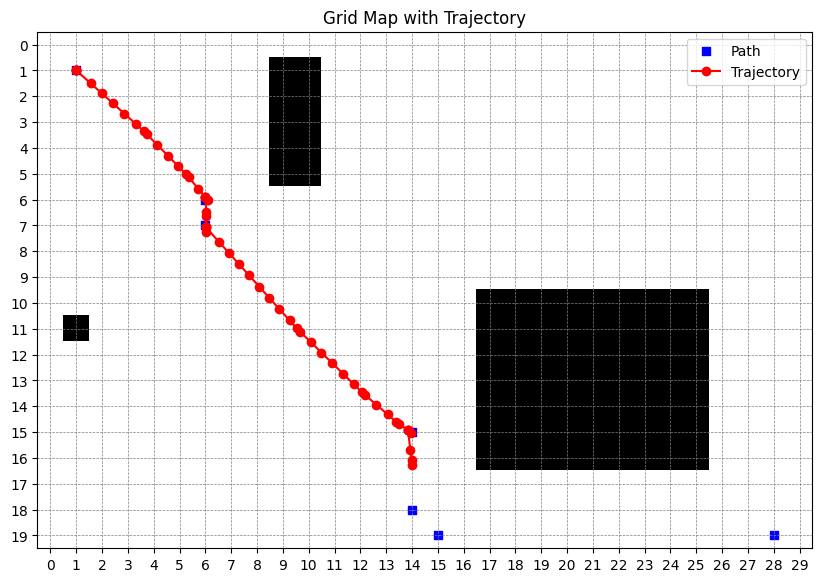

wl, wr:  58 52
Position:  [14.025833565046007, 16.848796372404465]
position 0:  14.025833565046007
position 1:  16.848796372404465
Angle:  1.5170419714527907
Kalman update:  (1401.7639584955891, 1668.368248167857, 1.5170424579159363)
Kalman position used:  [1401.7639584955891, 1668.368248167857]
current objective:  4
objective:  [1400, 1800]  position:  [1401.7639584955891, 1668.368248167857]
x_diff:  -1.7639584955891223  y_diff:  131.63175183214298  distance:  131.6435704467675
my angle:  1.5170424579159363
waypoint angle:  1.584196231396045
diff angle:  0.06715377348010865
angleDistance:  0.06715377348010865
Speed:  5.0 0
Kalman prediction:  (1401.7639584955891, 1668.368248167857, 1.5170424579159363)
Kalman pos 0:  1401.7639584955891
Kalman pos 1:  1668.368248167857
v, w  500 0
angle:  1.5170424579159363
New angle:  1.5170424579159363
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573

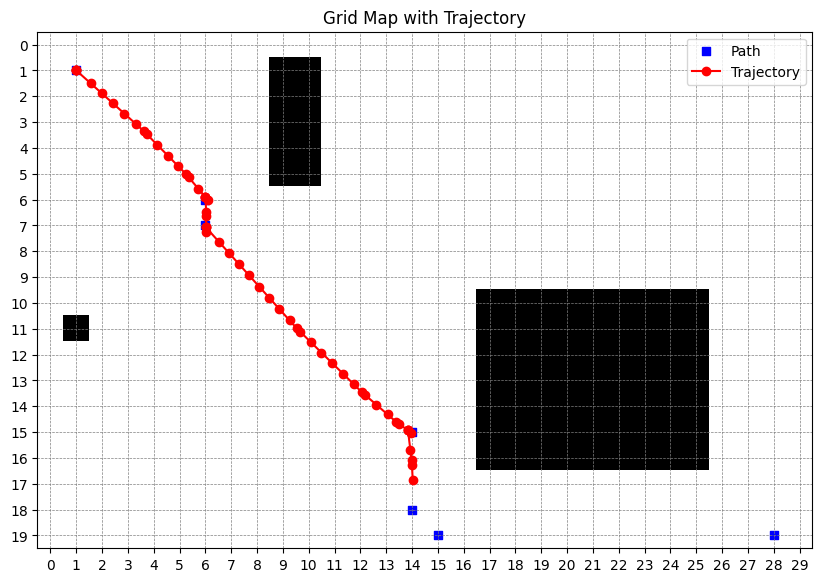

wl, wr:  58 52
Position:  [14.05793557433938, 17.432599188155066]
position 0:  14.05793557433938
position 1:  17.432599188155066
Angle:  1.5170424579159363
Kalman update:  (1404.9110061839044, 1726.749306878693, 1.5170424579159363)
Kalman position used:  [1404.9110061839044, 1726.749306878693]
current objective:  4
objective:  [1400, 1800]  position:  [1404.9110061839044, 1726.749306878693]
x_diff:  -4.911006183904419  y_diff:  73.250693121307  distance:  73.41513484623071
my angle:  1.5170424579159363
waypoint angle:  1.6377399643001815
diff angle:  0.12069750638424526
angleDistance:  0.12069750638424548
Speed:  0.0 0.4868132757497901
Kalman prediction:  (1404.910998663745, 1726.749167113591, 1.516968975099449)
Kalman pos 0:  1404.9110061839044
Kalman pos 1:  1726.749306878693
v, w  0 0.4868132757497901
angle:  1.5170424579159363
New angle:  1.5900644492784048
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8

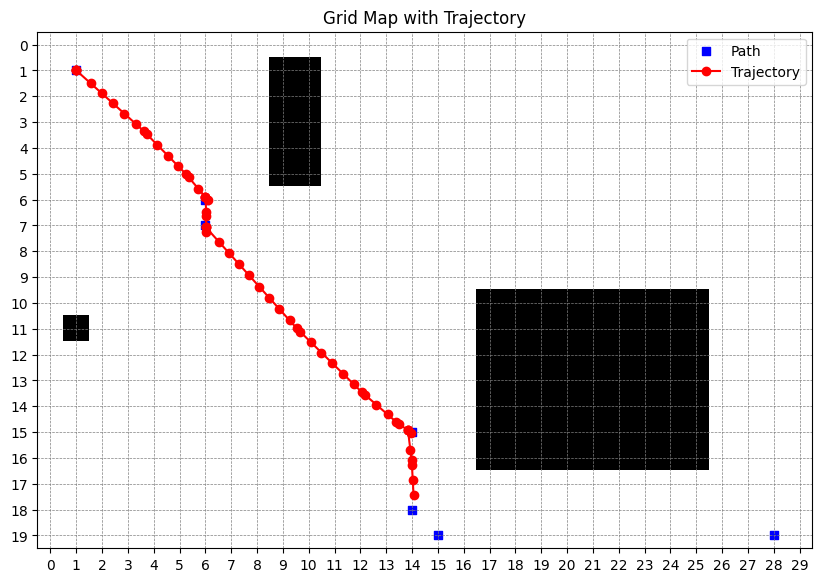

wl, wr:  -2 2
Position:  [14.049110061839045, 17.26749306878693]
position 0:  14.049110061839045
position 1:  17.26749306878693
Angle:  1.5900644492784048
Kalman update:  (1404.9110045269663, 1726.749276066872, 1.5888326794725762)
Kalman position used:  [1404.9110045269663, 1726.749276066872]
current objective:  4
objective:  [1400, 1800]  position:  [1404.9110045269663, 1726.749276066872]
x_diff:  -4.9110045269662805  y_diff:  73.25072393312803  distance:  73.41516547819816
my angle:  1.5888326794725762
waypoint angle:  1.6377399137065218
diff angle:  0.04890723423394561
angleDistance:  0.04890723423394583
Speed:  5.0 0
Kalman prediction:  (1404.9101360115244, 1726.7974244523296, 1.588890008303642)
Kalman pos 0:  1404.9110045269663
Kalman pos 1:  1726.749276066872
v, w  500 0
angle:  1.5888326794725762
New angle:  1.5888326794725762
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573963

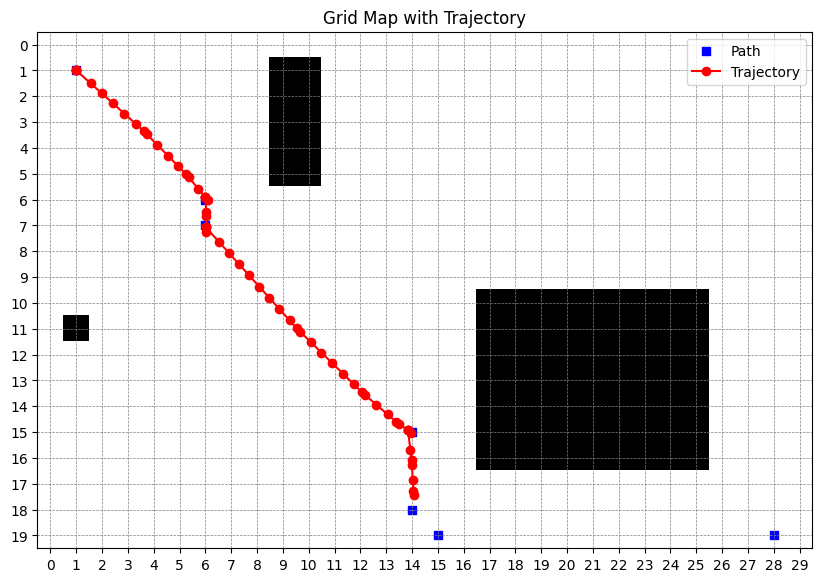

wl, wr:  58 52
Position:  [14.03558351417525, 18.017370772719048]
position 0:  14.03558351417525
position 1:  18.017370772719048
Angle:  1.5888326794725762
Kalman update:  (1403.9293636430152, 1785.2144390473454, 1.5888336455504888)
Kalman position used:  [1403.9293636430152, 1785.2144390473454]
current objective:  4
objective:  [1400, 1800]  position:  [1403.9293636430152, 1785.2144390473454]
x_diff:  -3.929363643015222  y_diff:  14.785560952654578  distance:  15.298781367276074
Next objective:  5
x_diff:  96.07063635698478  y_diff:  114.78556095265458  distance:  149.68397433677254
my angle:  1.5888336455504888
waypoint angle:  0.8739230056844994
diff angle:  -0.7149106398659894
angleDistance:  -0.7149106398659892
Speed:  0.0 -2.883472914126157
Kalman prediction:  (1403.929346737514, 1785.215376197048, 1.589325729190609)
Kalman pos 0:  1403.9293636430152
Kalman pos 1:  1785.2144390473454
v, w  0 -2.883472914126157
angle:  1.5888336455504888
New angle:  1.1563127084315652
Trajectory: 

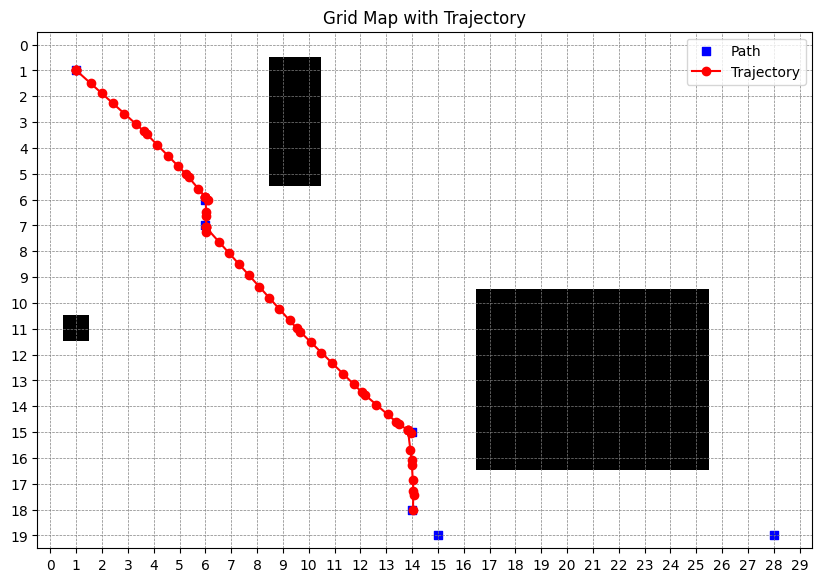

wl, wr:  15 -14
Position:  [14.039293636430152, 17.852144390473455]
position 0:  14.039293636430152
position 1:  17.852144390473455
Angle:  1.1563127084315652
Kalman update:  (1403.9293598392703, 1785.2146456462215, 1.1636096357788837)
Kalman position used:  [1403.9293598392703, 1785.2146456462215]
current objective:  5
objective:  [1500, 1900]  position:  [1403.9293598392703, 1785.2146456462215]
x_diff:  96.07064016072968  y_diff:  114.78535435377853  distance:  149.68381834725793
my angle:  1.1636096357788837
waypoint angle:  0.8739221003304666
diff angle:  -0.2896875354484171
angleDistance:  -0.28968753544841697
Speed:  0.0 -1.1684063929752817
Kalman prediction:  (1403.9293947811693, 1785.2147266633015, 1.1636559570365845)
Kalman pos 0:  1403.9293598392703
Kalman pos 1:  1785.2146456462215
v, w  0 -1.1684063929752817
angle:  1.1636096357788837
New angle:  0.9883486768325914
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.42775

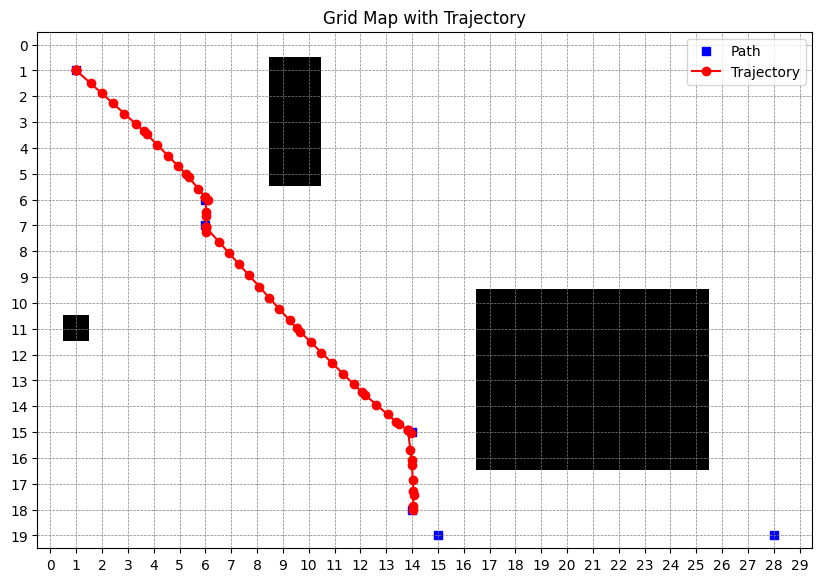

wl, wr:  6 -5
Position:  [14.039293598392703, 17.852146456462215]
position 0:  14.039293598392703
position 1:  17.852146456462215
Angle:  0.9883486768325914
Kalman update:  (1403.9293680035612, 1785.2146634432438, 0.9913028708770619)
Kalman position used:  [1403.9293680035612, 1785.2146634432438]
current objective:  5
objective:  [1500, 1900]  position:  [1403.9293680035612, 1785.2146634432438]
x_diff:  96.0706319964388  y_diff:  114.78533655675619  distance:  149.68379945953725
my angle:  0.9913028708770619
waypoint angle:  0.8739220658461131
diff angle:  -0.11738080503094883
angleDistance:  -0.11738080503094883
Speed:  0.0 -0.47343591362482695
Kalman prediction:  (1403.9293680035612, 1785.2146634432438, 0.9913028708770619)
Kalman pos 0:  1403.9293680035612
Kalman pos 1:  1785.2146634432438
v, w  0 -0.47343591362482695
angle:  0.9913028708770619
New angle:  0.9202874838333379
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.42775

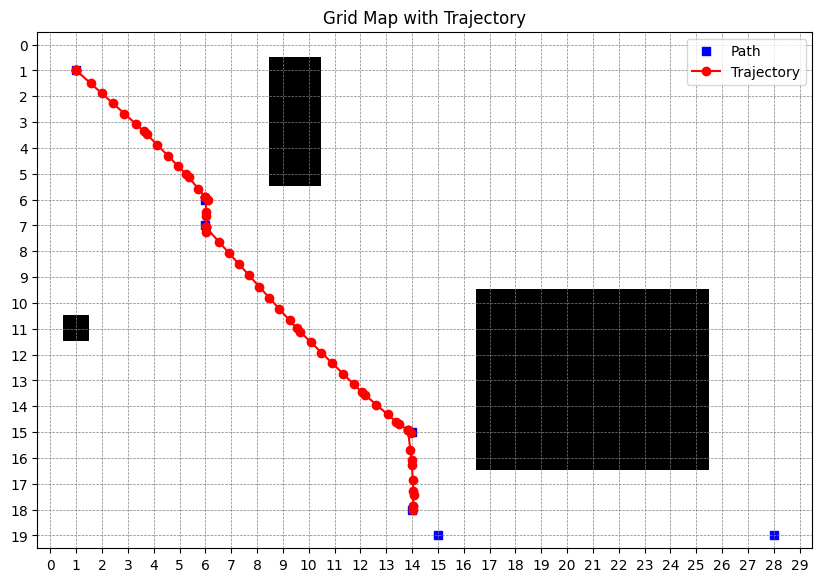

wl, wr:  2 -2
Position:  [14.039293680035613, 17.852146634432437]
position 0:  14.039293680035613
position 1:  17.852146634432437
Angle:  0.9202874838333379
Kalman update:  (1403.9293680035612, 1785.2146634432436, 0.9214842010103211)
Kalman position used:  [1403.9293680035612, 1785.2146634432436]
current objective:  5
objective:  [1500, 1900]  position:  [1403.9293680035612, 1785.2146634432436]
x_diff:  96.0706319964388  y_diff:  114.78533655675642  distance:  149.68379945953743
my angle:  0.9214842010103211
waypoint angle:  0.8739220658461141
diff angle:  -0.04756213516420704
angleDistance:  -0.04756213516420704
Speed:  5.0 0
Kalman prediction:  (1403.9962919494683, 1785.3028233975438, 0.9216159679148053)
Kalman pos 0:  1403.9293680035612
Kalman pos 1:  1785.2146634432436
v, w  500 0
angle:  0.9214842010103211
New angle:  0.9214842010103211
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.2

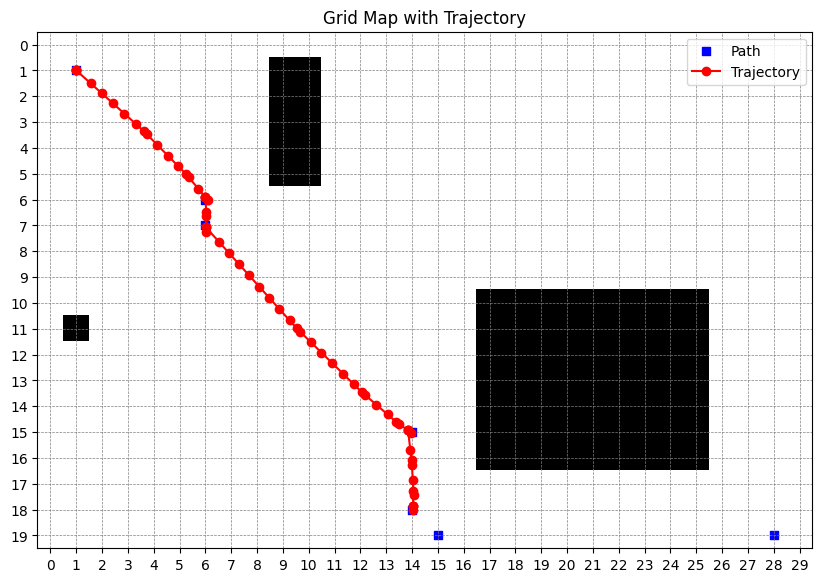

wl, wr:  58 52
Position:  [14.492772672847547, 18.449521561156242]
position 0:  14.492772672847547
position 1:  18.449521561156242
Angle:  0.9214842010103211
Kalman update:  (1439.2225597611746, 1831.8497969519944, 0.9214864214828767)
Kalman position used:  [1439.2225597611746, 1831.8497969519944]
current objective:  5
objective:  [1500, 1900]  position:  [1439.2225597611746, 1831.8497969519944]
x_diff:  60.77744023882542  y_diff:  68.15020304800555  distance:  91.31455205753561
my angle:  0.9214864214828767
waypoint angle:  0.8425212260643964
diff angle:  -0.07896519541848035
angleDistance:  -0.07896519541848024
Speed:  5.0 0
Kalman prediction:  (1439.2372283573832, 1831.8691202109014, 0.9215153026425724)
Kalman pos 0:  1439.2225597611746
Kalman pos 1:  1831.8497969519944
v, w  500 0
angle:  0.9214864214828767
New angle:  0.9214864214828767
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.2

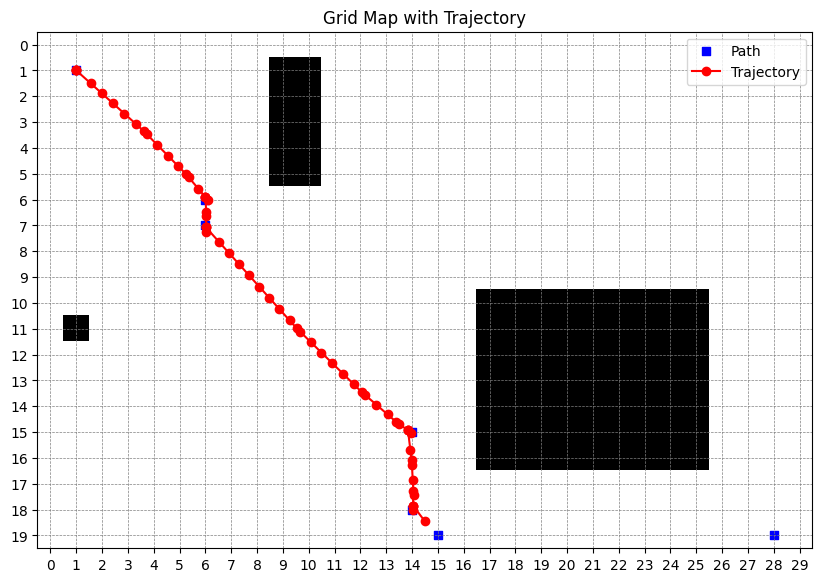

wl, wr:  58 52
Position:  [14.845703263967934, 18.915873903179936]
position 0:  14.845703263967934
position 1:  18.915873903179936
Angle:  0.9214864214828767
Kalman update:  (1474.5704979259133, 1878.4264387092865, 0.9214869081743015)
Kalman position used:  [1474.5704979259133, 1878.4264387092865]
current objective:  5
objective:  [1500, 1900]  position:  [1474.5704979259133, 1878.4264387092865]
x_diff:  25.429502074086713  y_diff:  21.573561290713542  distance:  33.34783534954187
my angle:  0.9214869081743015
waypoint angle:  0.7035455086606522
diff angle:  -0.21794139951364921
angleDistance:  -0.21794139951364944
Speed:  0.0 -0.8790303113717194
Kalman prediction:  (1474.5704979259133, 1878.4264387092865, 0.9214869081743015)
Kalman pos 0:  1474.5704979259133
Kalman pos 1:  1878.4264387092865
v, w  0 -0.8790303113717194
angle:  0.9214869081743015
New angle:  0.7896323614685435
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.42775

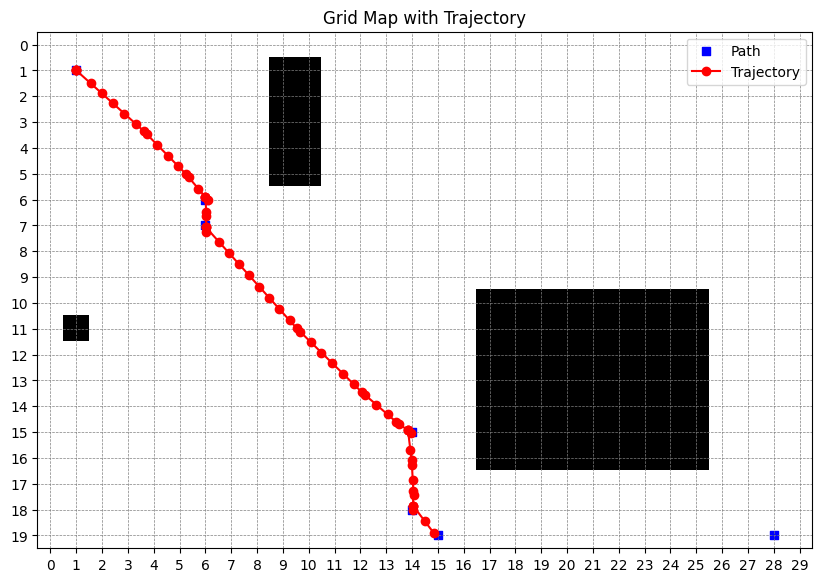

wl, wr:  4 -4
Position:  [14.745704979259132, 18.784264387092865]
position 0:  14.745704979259132
position 1:  18.784264387092865
Angle:  0.7896323614685435
Kalman update:  (1474.5704979259133, 1878.4264387092865, 0.7918543109287214)
Kalman position used:  [1474.5704979259133, 1878.4264387092865]
current objective:  5
objective:  [1500, 1900]  position:  [1474.5704979259133, 1878.4264387092865]
x_diff:  25.429502074086713  y_diff:  21.573561290713542  distance:  33.34783534954187
my angle:  0.7918543109287214
waypoint angle:  0.7035455086606522
diff angle:  -0.08830880226806914
angleDistance:  -0.08830880226806936
Speed:  5.0 0
Kalman prediction:  (1474.6199614298341, 1878.476545059809, 0.7919381299604368)
Kalman pos 0:  1474.5704979259133
Kalman pos 1:  1878.4264387092865
v, w  500 0
angle:  0.7918543109287214
New angle:  0.7918543109287214
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.2

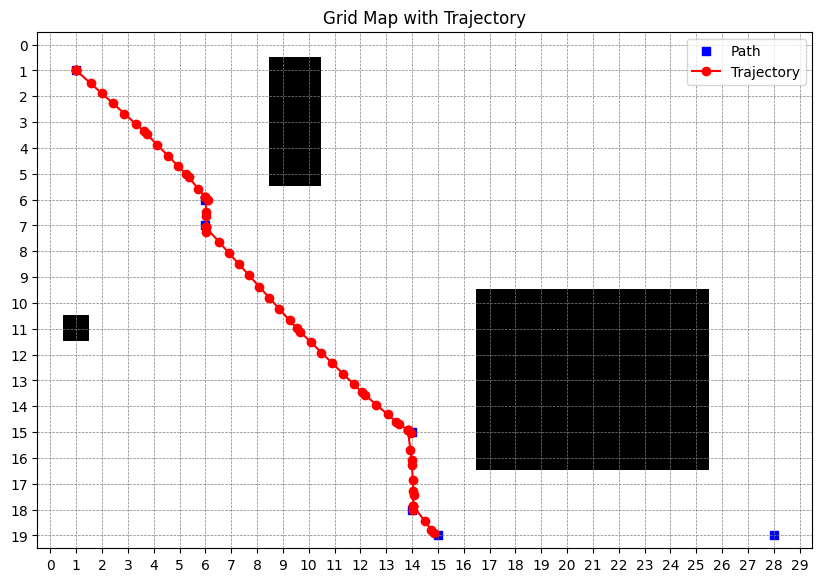

wl, wr:  58 52
Position:  [15.272600147131131, 19.31800728594318]
position 0:  15.272600147131131
position 1:  19.31800728594318
Angle:  0.7918543109287214
Kalman update:  (1515.555020684151, 1920.129540073715, 0.7918557234067658)
Kalman position used:  [1515.555020684151, 1920.129540073715]
current objective:  5
objective:  [1500, 1900]  position:  [1515.555020684151, 1920.129540073715]
x_diff:  -15.555020684151032  y_diff:  -20.129540073714907  distance:  25.43928167349976
my angle:  0.7918557234067658
waypoint angle:  -2.228696629942482
diff angle:  -3.020552353349248
angleDistance:  -3.020552353349248
Speed:  0.0 -3.14
Kalman prediction:  (1515.555020684151, 1920.129540073715, 0.7918557234067658)
Kalman pos 0:  1515.555020684151
Kalman pos 1:  1920.129540073715
v, w  0 -3.14
angle:  0.7918557234067658
New angle:  0.3208557234067658
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.2975739

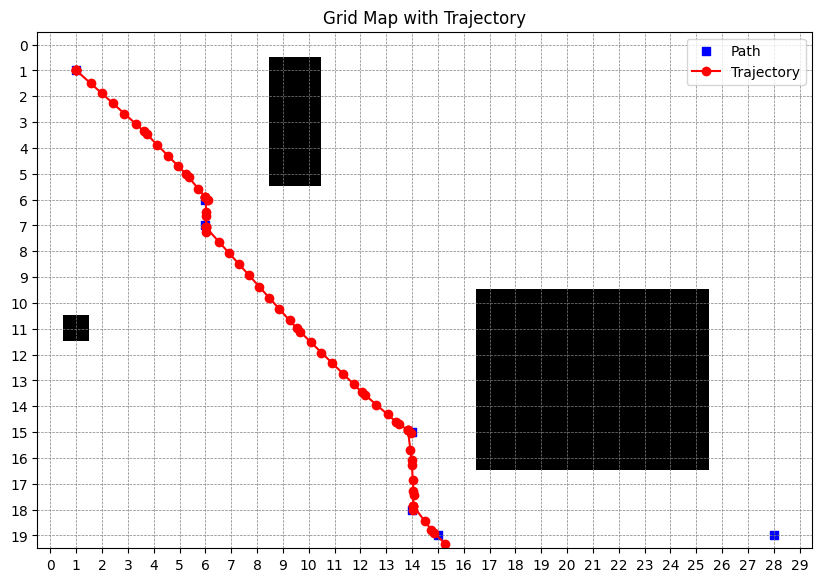

wl, wr:  16 -15
Position:  [15.15555020684151, 19.20129540073715]
position 0:  15.15555020684151
position 1:  19.20129540073715
Angle:  0.3208557234067658
Kalman update:  (1515.555020684151, 1920.129540073715, 0.3287927890741271)
Kalman position used:  [1515.555020684151, 1920.129540073715]
current objective:  5
objective:  [1500, 1900]  position:  [1515.555020684151, 1920.129540073715]
x_diff:  -15.555020684151032  y_diff:  -20.129540073714907  distance:  25.43928167349976
my angle:  0.3287927890741271
waypoint angle:  -2.228696629942482
diff angle:  -2.5574894190166093
angleDistance:  -2.5574894190166093
Speed:  0.0 -3.14
Kalman prediction:  (1515.5554015185578, 1920.1296700054952, 0.32900404343323153)
Kalman pos 0:  1515.555020684151
Kalman pos 1:  1920.129540073715
v, w  0 -3.14
angle:  0.3287927890741271
New angle:  6.140978096253713
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.2975

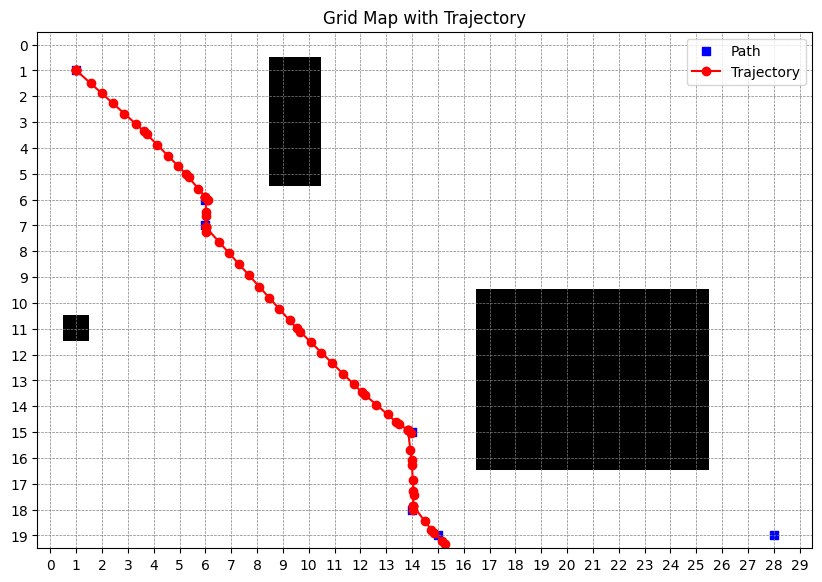

wl, wr:  16 -15
Position:  [15.15555020684151, 19.20129540073715]
position 0:  15.15555020684151
position 1:  19.20129540073715
Angle:  6.140978096253713
Kalman update:  (1515.5551059765316, 1920.1295668713576, 6.0430375023806)
Kalman position used:  [1515.5551059765316, 1920.1295668713576]
current objective:  5
objective:  [1500, 1900]  position:  [1515.5551059765316, 1920.1295668713576]
x_diff:  -15.55510597653165  y_diff:  -20.12956687135761  distance:  25.439355030534646
my angle:  6.0430375023806
waypoint angle:  -2.228698638813055
diff angle:  -8.271736141193655
angleDistance:  -1.9885508340140685
Speed:  0.0 -3.14
Kalman prediction:  (1515.5556183128338, 1920.1294414138436, 6.043314425859198)
Kalman pos 0:  1515.5551059765316
Kalman pos 1:  1920.1295668713576
v, w  0 -3.14
angle:  6.0430375023806
New angle:  5.5720375023806
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.297573963222

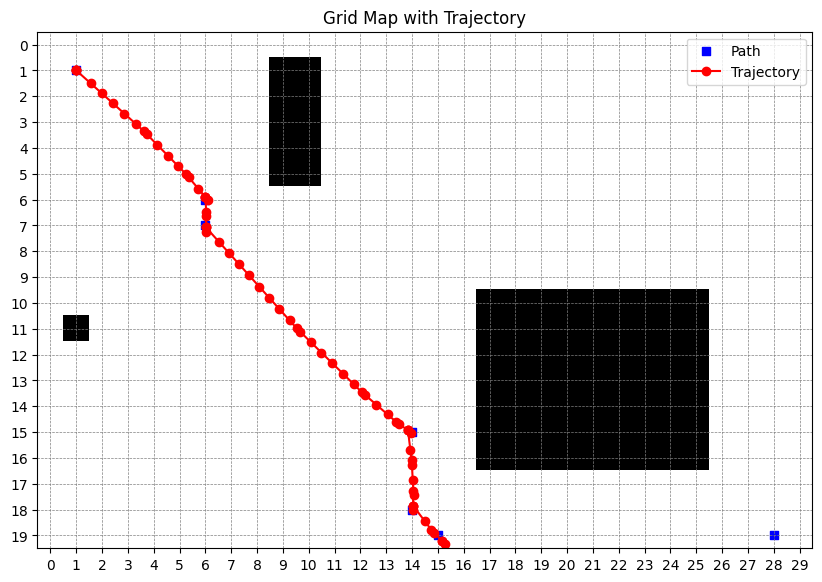

wl, wr:  16 -15
Position:  [15.155551059765317, 19.201295668713577]
position 0:  15.155551059765317
position 1:  19.201295668713577
Angle:  5.5720375023806
Kalman update:  (1515.5552195125088, 1920.1295357708493, 5.579979234629351)
Kalman position used:  [1515.5552195125088, 1920.1295357708493]
current objective:  5
objective:  [1500, 1900]  position:  [1515.5552195125088, 1920.1295357708493]
x_diff:  -15.555219512508756  y_diff:  -20.129535770849316  distance:  25.439399844183338
my angle:  5.579979234629351
waypoint angle:  -2.2287029178066757
diff angle:  -7.8086821524360275
angleDistance:  -1.5254968452564412
Speed:  0.0 -3.14
Kalman prediction:  (1515.5552195125088, 1920.1295357708493, 5.579979234629351)
Kalman pos 0:  1515.5552195125088
Kalman pos 1:  1920.1295357708493
v, w  0 -3.14
angle:  5.579979234629351
New angle:  5.108979234629351
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 

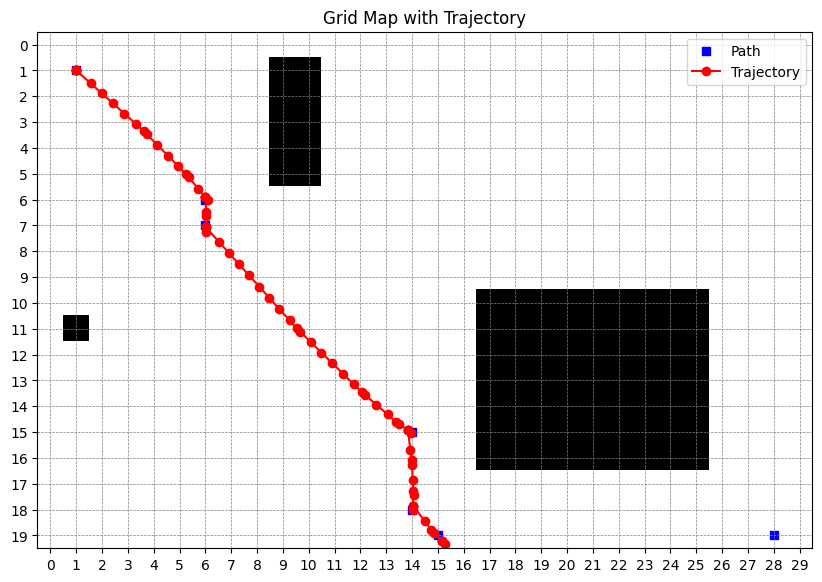

wl, wr:  16 -15
Position:  [15.155552195125088, 19.201295357708492]
position 0:  15.155552195125088
position 1:  19.201295357708492
Angle:  5.108979234629351
Kalman update:  (1515.5552195125088, 1920.1295357708493, 5.116916300296713)
Kalman position used:  [1515.5552195125088, 1920.1295357708493]
current objective:  5
objective:  [1500, 1900]  position:  [1515.5552195125088, 1920.1295357708493]
x_diff:  -15.555219512508756  y_diff:  -20.129535770849316  distance:  25.439399844183338
my angle:  5.116916300296713
waypoint angle:  -2.2287029178066757
diff angle:  -7.345619218103389
angleDistance:  -1.0624339109238026
Speed:  0.0 -3.14
Kalman prediction:  (1515.5552195125088, 1920.1295357708493, 5.116916300296713)
Kalman pos 0:  1515.5552195125088
Kalman pos 1:  1920.1295357708493
v, w  0 -3.14
angle:  5.116916300296713
New angle:  4.6459163002967125
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274

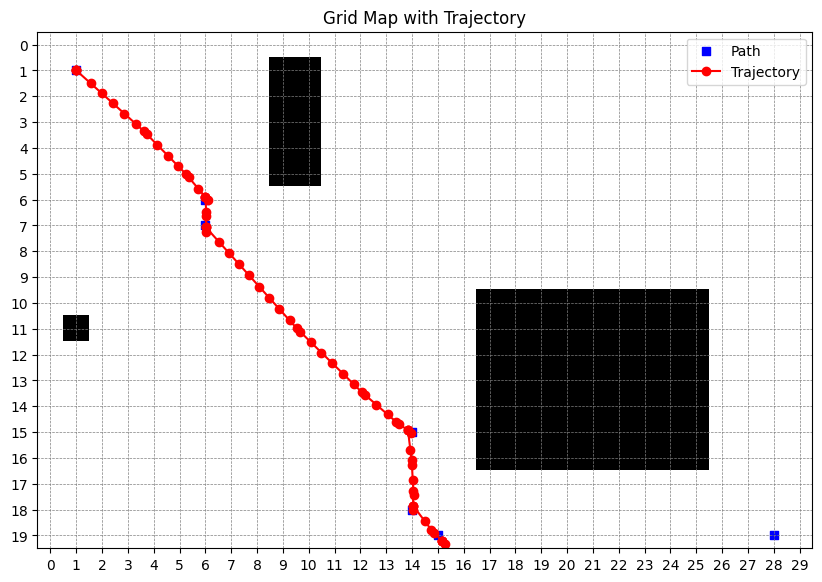

wl, wr:  16 -15
Position:  [15.155552195125088, 19.201295357708492]
position 0:  15.155552195125088
position 1:  19.201295357708492
Angle:  4.6459163002967125
Kalman update:  (1515.5552195125088, 1920.1295357708493, 4.653853365964074)
Kalman position used:  [1515.5552195125088, 1920.1295357708493]
current objective:  5
objective:  [1500, 1900]  position:  [1515.5552195125088, 1920.1295357708493]
x_diff:  -15.555219512508756  y_diff:  -20.129535770849316  distance:  25.439399844183338
my angle:  4.653853365964074
waypoint angle:  -2.2287029178066757
diff angle:  -6.88255628377075
angleDistance:  -0.5993709765911639
Speed:  0.0 -2.4174629389176943
Kalman prediction:  (1515.5551815758745, 1920.1288884163125, 4.654193810181455)
Kalman pos 0:  1515.5552195125088
Kalman pos 1:  1920.1295357708493
v, w  0 -2.4174629389176943
angle:  4.653853365964074
New angle:  4.29123392512642
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624

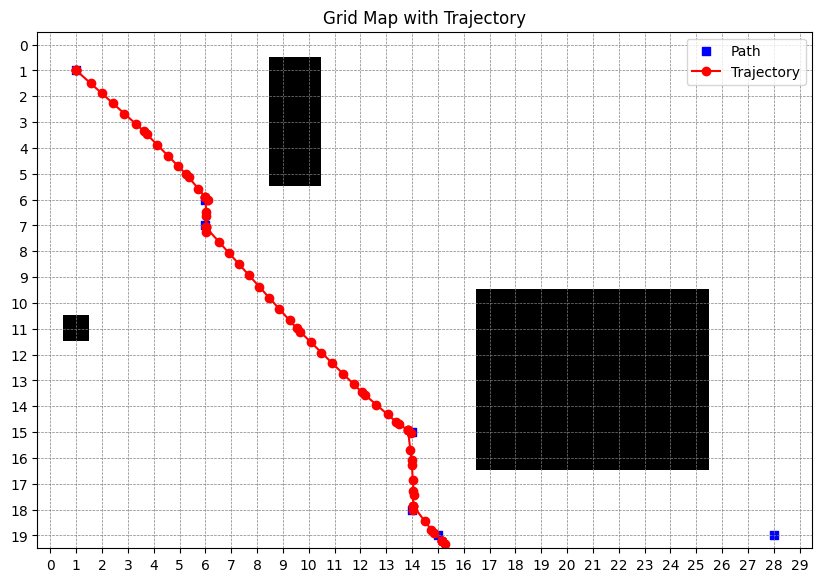

wl, wr:  13 -11
Position:  [15.155552195125088, 19.201295357708492]
position 0:  15.155552195125088
position 1:  19.201295357708492
Angle:  4.29123392512642
Kalman update:  (1515.5552075727528, 1920.129392043373, 4.297350350693935)
Kalman position used:  [1515.5552075727528, 1920.129392043373]
current objective:  5
objective:  [1500, 1900]  position:  [1515.5552075727528, 1920.129392043373]
x_diff:  -15.555207572752806  y_diff:  -20.129392043372945  distance:  25.439278815784704
my angle:  4.297350350693935
waypoint angle:  -2.2287060010793516
diff angle:  -6.526056351773287
angleDistance:  -0.24287104459370035
Speed:  0.0 -0.9795798798612582
Kalman prediction:  (1515.5551233953229, 1920.1292010066684, 4.297459949850588)
Kalman pos 0:  1515.5552075727528
Kalman pos 1:  1920.129392043373
v, w  0 -0.9795798798612582
angle:  4.297350350693935
New angle:  4.150413368714746
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165

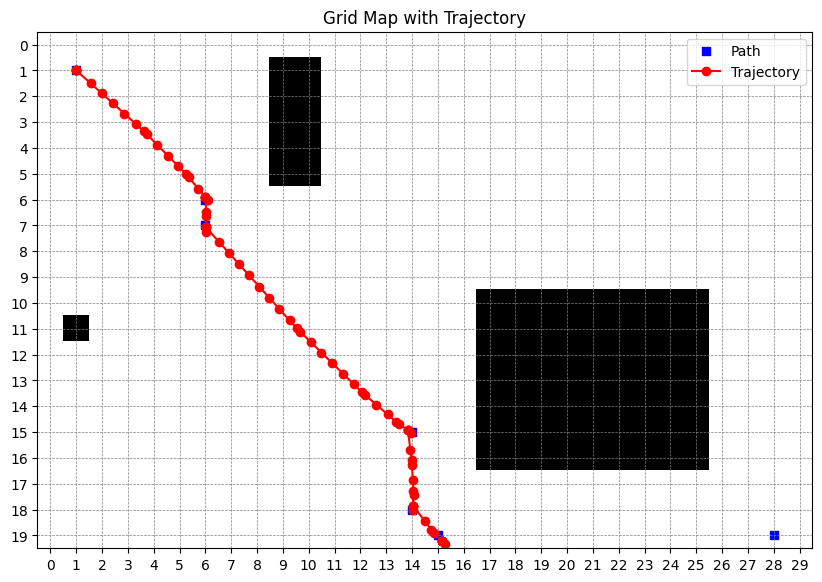

wl, wr:  5 -4
Position:  [15.155552075727527, 19.20129392043373]
position 0:  15.155552075727527
position 1:  19.20129392043373
Angle:  4.150413368714746
Kalman update:  (1515.5551880402977, 1920.1293500763124, 4.152891327038814)
Kalman position used:  [1515.5551880402977, 1920.1293500763124]
current objective:  5
objective:  [1500, 1900]  position:  [1515.5551880402977, 1920.1293500763124]
x_diff:  -15.555188040297708  y_diff:  -20.12935007631245  distance:  25.439233665025384
my angle:  4.152891327038814
waypoint angle:  -2.228706402265446
diff angle:  -6.381597729304261
angleDistance:  -0.09841242212467449
Speed:  5.0 0
Kalman prediction:  (1515.5287106080107, 1920.0870707401748, 4.1529507149394265)
Kalman pos 0:  1515.5551880402977
Kalman pos 1:  1920.1293500763124
v, w  500 0
angle:  4.152891327038814
New angle:  4.152891327038814
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.2975739

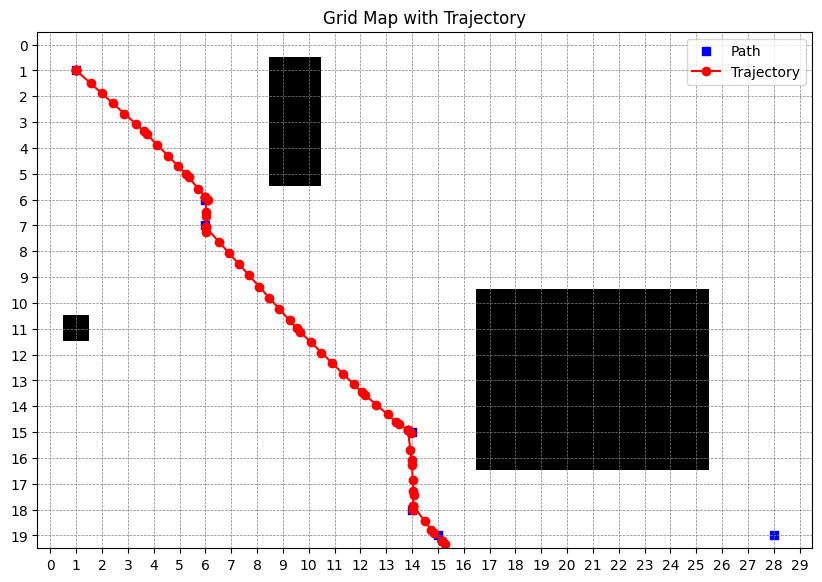

wl, wr:  58 52
Position:  [14.75748149404379, 18.565652117982044]
position 0:  14.75748149404379
position 1:  18.565652117982044
Angle:  4.152891327038814
Kalman update:  (1484.6718612498676, 1870.4984684404149, 4.152892327815177)
Kalman position used:  [1484.6718612498676, 1870.4984684404149]
current objective:  5
objective:  [1500, 1900]  position:  [1484.6718612498676, 1870.4984684404149]
x_diff:  15.328138750132439  y_diff:  29.501531559585146  distance:  33.245935118515014
my angle:  4.152892327815177
waypoint angle:  1.0916148231528344
diff angle:  -3.0612775046623426
angleDistance:  -3.0612775046623426
Speed:  0.0 -3.14
Kalman prediction:  (1484.6718612498676, 1870.4984684404149, 4.152892327815177)
Kalman pos 0:  1484.6718612498676
Kalman pos 1:  1870.4984684404149
v, w  0 -3.14
angle:  4.152892327815177
New angle:  3.681892327815177
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.29

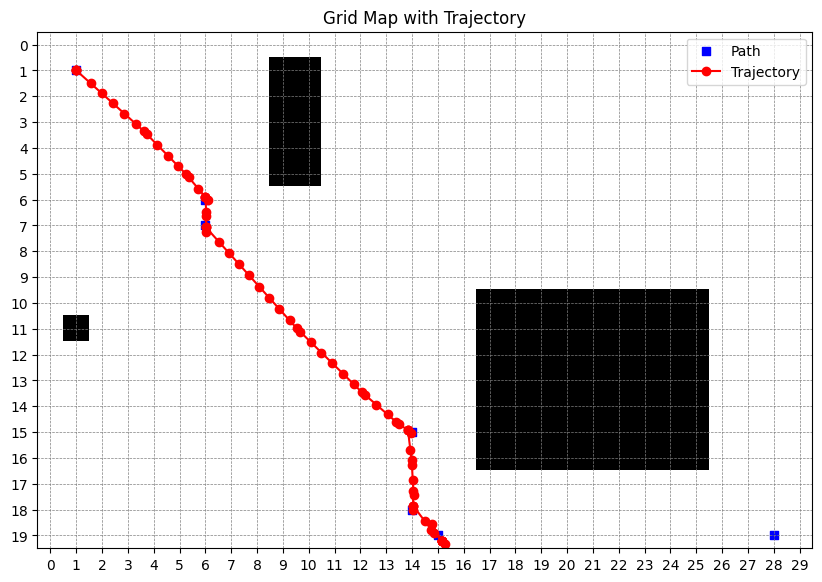

wl, wr:  16 -15
Position:  [14.846718612498675, 18.70498468440415]
position 0:  14.846718612498675
position 1:  18.70498468440415
Angle:  3.681892327815177
Kalman update:  (1484.6718612498676, 1870.4984684404149, 3.6898293934825386)
Kalman position used:  [1484.6718612498676, 1870.4984684404149]
current objective:  5
objective:  [1500, 1900]  position:  [1484.6718612498676, 1870.4984684404149]
x_diff:  15.328138750132439  y_diff:  29.501531559585146  distance:  33.245935118515014
my angle:  3.6898293934825386
waypoint angle:  1.0916148231528344
diff angle:  -2.598214570329704
angleDistance:  -2.598214570329704
Speed:  0.0 -3.14
Kalman prediction:  (1484.6718612498676, 1870.4984684404149, 3.6898293934825386)
Kalman pos 0:  1484.6718612498676
Kalman pos 1:  1870.4984684404149
v, w  0 -3.14
angle:  3.6898293934825386
New angle:  3.2188293934825385
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 

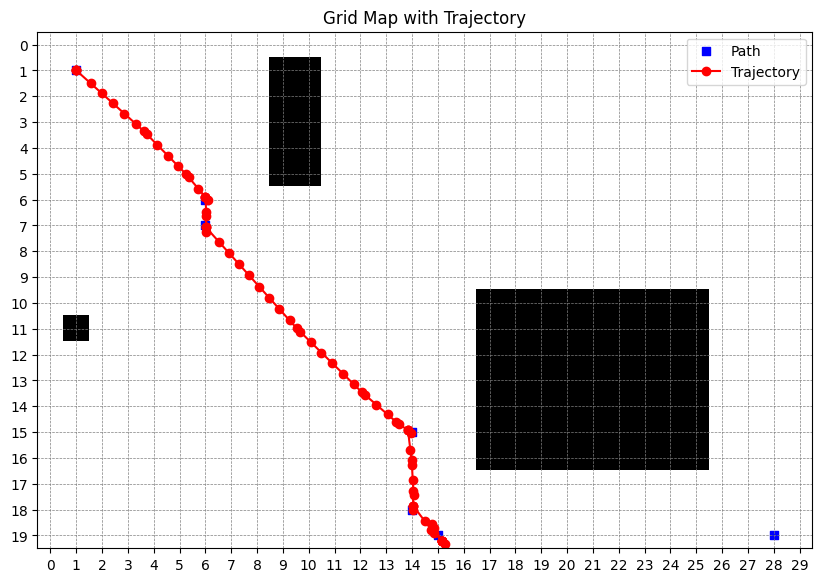

wl, wr:  16 -15
Position:  [14.846718612498675, 18.70498468440415]
position 0:  14.846718612498675
position 1:  18.70498468440415
Angle:  3.2188293934825385
Kalman update:  (1484.6718612498676, 1870.4984684404149, 3.2267664591499)
Kalman position used:  [1484.6718612498676, 1870.4984684404149]
current objective:  5
objective:  [1500, 1900]  position:  [1484.6718612498676, 1870.4984684404149]
x_diff:  15.328138750132439  y_diff:  29.501531559585146  distance:  33.245935118515014
my angle:  3.2267664591499
waypoint angle:  1.0916148231528344
diff angle:  -2.1351516359970653
angleDistance:  -2.1351516359970653
Speed:  0.0 -3.14
Kalman prediction:  (1484.6702051843715, 1870.4983270449272, 3.227639056785776)
Kalman pos 0:  1484.6718612498676
Kalman pos 1:  1870.4984684404149
v, w  0 -3.14
angle:  3.2267664591499
New angle:  2.7557664591499
Trajectory:  [1.0, 1.0, 0.9999929326734346, 0.9999929326734346, 1.5576370290363235, 1.992998872970713, 2.4277588624165523, 2.8626811247873274, 3.29757396

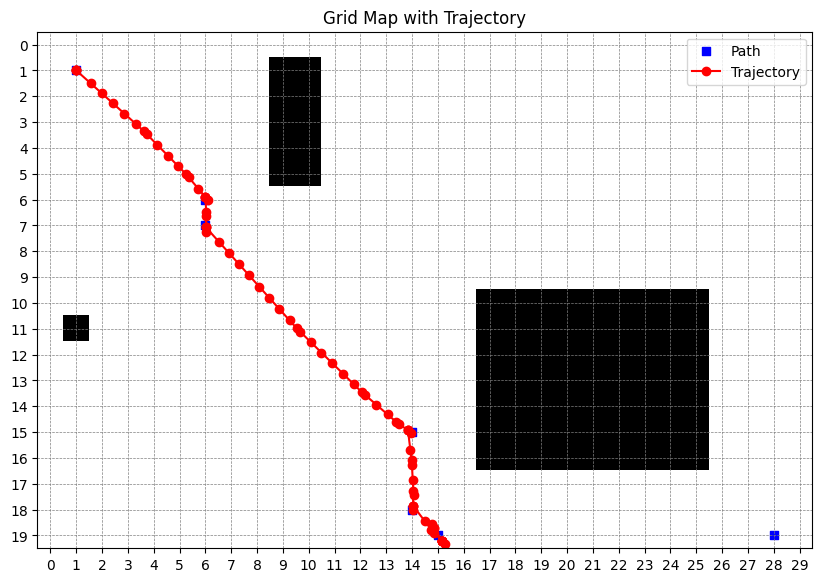

wl, wr:  16 -15


KeyboardInterrupt: 

In [11]:
x_trajectory = []
y_trajectory = []
kalman_positions = []

dt = 0.15

iter = 1

goal = False

map = matrix

# initial position and angle
position = [1, 1]
angle = 0
angle = (2 * math.pi - angle) % (2 * math.pi)

thymio.set_timestep(dt)

leds()

while not goal:
    print("Position: ", position)
    print("position 0: ", position[0])
    print("position 1: ", position[1])
    print("Angle: ", angle)

    if (iter == 1):
        print("First iteration")

        thymio.set_pose(position, angle)

        print("Computing path")
        print("Map shape: ", map.shape)
        path = globalPlanning.dijkstra(map, position, (19, 28))
        thymio.set_path(path)
        plotter.set_map(map, position, (19, 28))
        plotter.plot_path(thymio.get_path_cells())
        print("Path: ", thymio.get_path_cells())
        filter.initialize_position(thymio.get_position()[0], thymio.get_position()[1], angle)
        filter.set_lastKalman_time()

    # check if camera is obstructed
    if position is not None:
        thymio.update_pose(position, angle)
        x_trajectory.append(float(position[0]))
        y_trajectory.append(float(position[1]))
        # camera measuerement that will then be used for the Kalman filter
        measurement = np.array([thymio.get_position()[0], thymio.get_position()[1], angle])
        filter.kalman_update(measurement)
        print("Kalman update: ", filter.get_state())
    
    # get the state from the Kalman filter
    # the result will depend on the mode of the filter
    x, y, angle = filter.get_state()
    kalman_position = [x, y]
    kalman_positions.append(position)
    print("Kalman position used: ", kalman_position)

    # check if the robot is detecting an obstacle
    # tmclient function to get the proximity sensors
    prox = sensor_data()
    if (localPlanning.is_local_planning(prox)):
        # move with local planning until the robot is not back on the path
        wl, wr = localPlanning.local_planning(prox)
        v, w = thymio.inverseDifferentialDrive(wl, wr)
    else:
        # move with global planning
        v, w, wl, wr, goal = thymio.move(kalman_position, angle)

    print("Speed: ", thymio.convert_speed_cells(v), w)

    # update the Kalman filter
    filter.kalman_prediction(wl, wr)
    print("Kalman prediction: ", filter.get_state())

    # tmdclient function to move the motors
    wl = int(wl)
    wr = int(wr)

    print("Kalman pos 0: ", kalman_position[0])
    print("Kalman pos 1: ", kalman_position[1])
    print("v, w ", v, w)
    print("angle: ", angle)
    print("New angle: ", (angle + w*dt) % (2 * math.pi))

    if abs(w) < 1e-6:
        # treat as a straight line
        position[0] = kalman_position[0] + v * dt * math.cos(angle)
        position[1] = kalman_position[1] + v * dt * math.sin(angle)
    else:
        # use the circular motion equations
        position[0] = kalman_position[0] + (v / w) * (math.sin(angle + w * dt) - math.sin(angle))
        position[1] = kalman_position[1] - (v / w) * (math.cos(angle + w * dt) - math.cos(angle))

    position[0] = thymio.mm_to_cells(position[0])
    position[1] = thymio.mm_to_cells(position[1])

    angle = (angle + w*dt) % (2 * math.pi)
    
    print("Trajectory: ", x_trajectory, y_trajectory)
    plotter.plot_trajectory(x_trajectory, y_trajectory)

    print("wl, wr: ", wl, wr)
    motor_go(wl, wr)
    
    
    # sleep for a while
    iter += 1
    time.sleep(dt)

motor_stop()